In [146]:
%load_ext autoreload
%autoreload complete

In [147]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)
df.head()

(208971, 52)


,method,distance__inverse,agg_weekly,normalize,training_interval,start_date,end_date,protest_group,source,discourse_type,co_terms,prediction_interval,event_date,sub_event_type,assoc_actor_1,admin1,location,notes,weekday,region_code,size,hash,csv,seed,n_theoretical_control_regions,method_group,impact_1_weeks,relative_impact_1_weeks,impact_2_weeks,relative_impact_2_weeks,impact_3_weeks,relative_impact_3_weeks,impact_4_weeks,relative_impact_4_weeks,n_control_regions,rrmse_mean,rrmse_std,rrmses,date,start_ts,end_ts,duration,sociodemographic__method,sociodemographic__sum_to_one,interpretable,alpha,use_autoregressor,lags,pruned,n_splines,spline_order,lam
0,distance,False,True,standard,84,2020-01-01,2022-12-31,fff,mediacloud,climate,NaN,28,2022-11-05T00:00:00,Peaceful protest,FFF: Fridays for Future; Students (Germany),Sachsen,Dresden,"On 5 November 2022, members of FFF (including ...",Saturday,SN,NaN,efabb41254b2cc61103b3c4495286de0,/Users/david/Repositories/protest-impact/data/...,20230413,13,grounded,28.021099,0.298164,19.279475,0.233068,13.573706,0.176834,15.050769,0.203528,12.0,0.205079,0.189040,"[0.07203607329012895, 0.10603568173909604, 0.1...",2023-05-09,1.683621e+09,1.683621e+09,0.003563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,distance,True,True,standard,84,2020-01-01,2022-12-31,fff,mediacloud,climate,NaN,28,2022-11-05T00:00:00,Peaceful protest,FFF: Fridays for Future; Students (Germany),Sachsen,Dresden,"On 5 November 2022, members of FFF (including ...",Saturday,SN,NaN,efabb41254b2cc61103b3c4495286de0,/Users/david/Repositories/protest-impact/data/...,20230413,13,grounded,27.974377,0.297519,18.201739,0.217209,13.167039,0.170632,15.195351,0.205886,12.0,0.191726,0.156944,"[0.10195589781762875, 0.12336882572447559, 0.0...",2023-05-09,1.683621e+09,1.683621e+09,0.002617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sociodemographic,NaN,True,standard,84,2020-01-01,2022-12-31,fff,mediacloud,climate,NaN,28,2022-11-05T00:00:00,Peaceful protest,FFF: Fridays for Future; Students (Germany),Sachsen,Dresden,"On 5 November 2022, members of FFF (including ...",Saturday,SN,NaN,efabb41254b2cc61103b3c4495286de0,/Users/david/Repositories/protest-impact/data/...,20230413,13,grounded,29.254357,0.315426,21.090333,0.260665,15.356487,0.204816,16.848705,0.233519,12.0,0.215032,0.204958,"[0.06463127810343196, 0.1052851893923474, 0.12...",2023-05-09,1.683621e+09,1.683621e+09,0.002851,nmf,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lasso,NaN,True,mean,28,2020-01-01,2022-12-31,fff,mediacloud,climate,NaN,28,2022-11-05T00:00:00,Peaceful protest,FFF: Fridays for Future; Students (Germany),Sachsen,Dresden,"On 5 November 2022, members of FFF (including ...",Saturday,SN,NaN,efabb41254b2cc61103b3c4495286de0,/Users/david/Repositories/protest-impact/data/...,20230413,13,linear_weighted_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-09,1.683621e+09,1.683621e+09,0.019599,NaN,NaN,True,0.01,False,14.0,True,NaN,NaN,NaN
4,lasso,NaN,True,mean,84,2020-01-01,2022-12-31,fff,mediacloud,climate,NaN,28,2022-11-05T00:00:00,Peaceful protest,FFF: Fridays for Future; Students (Germany),Sachsen,Dresden,"On 5 November 2022, members of FFF (including ...",Saturday,SN,NaN,efabb41254b2cc61103b3c4495286de0,/Users/david/Repositories/protest-impact/data/...,20230413,13,linear_weighted_sum,47.253133,0.632175,33.129718,0.481045,24.729647,0.376955,24.036208,0.369994,12.0,0.206496,0.136952,"[0.12508818791792928, 0.1595500153771854, 0.10...",2023-05-09,1.683621e+09,1.683621e+09,0.057218,NaN,NaN,True,0.01,False,14.0,NaN,NaN,NaN,NaN


In [148]:
df.columns

Index(['method', 'distance__inverse', 'agg_weekly', 'normalize',
       'training_interval', 'start_date', 'end_date', 'protest_group',
       'source', 'discourse_type', 'co_terms', 'prediction_interval',
       'event_date', 'sub_event_type', 'assoc_actor_1', 'admin1', 'location',
       'notes', 'weekday', 'region_code', 'size', 'hash', 'csv', 'seed',
       'n_theoretical_control_regions', 'method_group', 'impact_1_weeks',
       'relative_impact_1_weeks', 'impact_2_weeks', 'relative_impact_2_weeks',
       'impact_3_weeks', 'relative_impact_3_weeks', 'impact_4_weeks',
       'relative_impact_4_weeks', 'n_control_regions', 'rrmse_mean',
       'rrmse_std', 'rrmses', 'date', 'start_ts', 'end_ts', 'duration',
       'sociodemographic__method', 'sociodemographic__sum_to_one',
       'interpretable', 'alpha', 'use_autoregressor', 'lags', 'pruned',
       'n_splines', 'spline_order', 'lam'],
      dtype='object')

In [149]:
df["discourse_type"].value_counts()

climate                69657
climate_not_protest    69657
climate_and_protest    69657
Name: discourse_type, dtype: int64

## Overall discourse

In [151]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape

(0008ae64337cb59801bcb4aeb5b01118    5
 ae23f542aa81a4e90613b3a376a89333    5
 abb727096e8014a561a1cfea8e4d821f    5
 abbaddf7f3897f7648c425256d798062    5
 ac17ad52e817aaebf38823086dd5c06a    5
                                    ..
 5b40ca56c8f45c2f055b97ec1cc4bc34    5
 5b7b53441988c6b6e00a57c9f3bff65d    5
 5bdb5bff253c5884a9ab5c9e616a77e4    5
 5be36700b295098271b8aa2afac084f6    5
 ffefd81c770862db89f165d8131cc81e    5
 Name: hash, Length: 749, dtype: int64,
 distance            749
 gam                 749
 lasso               749
 ridge               749
 sociodemographic    749
 Name: method, dtype: int64,
 (3745, 52))

<Axes: title={'center': 'rrmse_mean'}, xlabel='method'>

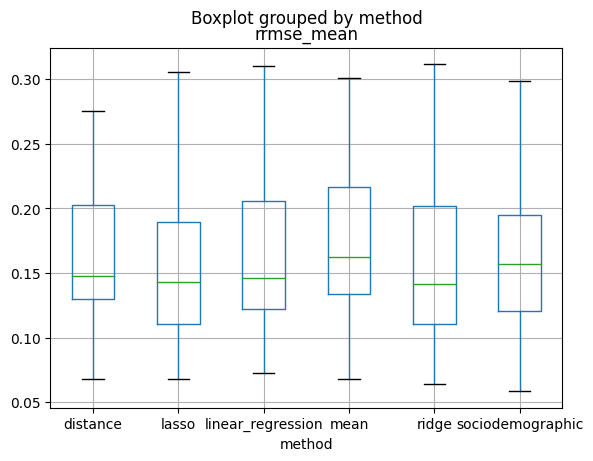

In [ ]:
df_.boxplot(column="rrmse_mean", by="method", showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='method'>

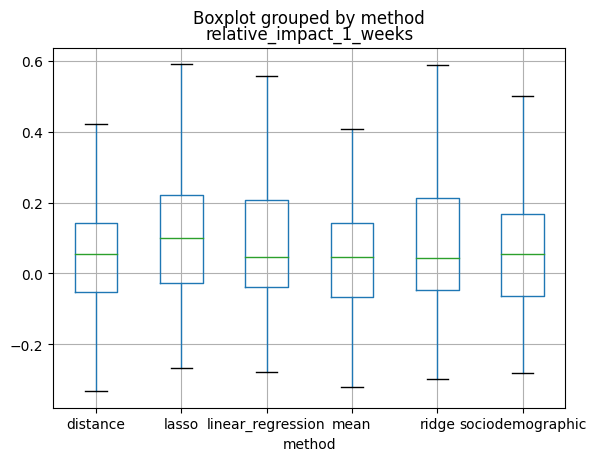

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by="method", showfliers=False)

## Protest discourse

In [ ]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_and_protest'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape

(030f420653795bb6561785f5d268d380    6
 aff26a30c8777e21953204f4b3a742f6    6
 c959d3226677cf41f38476051d8e6fab    6
 c67c07795f91636891fca6f58d1a5d2c    6
 c5653bb3f825cd2c21648d2e0f8aba85    6
                                    ..
 49d4ded1366abc89e6303acd7cbb0647    6
 47c29062c545d5c87f8425c59be58593    6
 45b9a3659658710962c53e9f2772c4c5    6
 444fc5ca8bf3b118d5012ab1bef6f8c7    6
 ffba329c017ddc16d2b7b3a522e25d22    6
 Name: hash, Length: 134, dtype: int64,
 distance             134
 lasso                134
 linear_regression    134
 mean                 134
 ridge                134
 sociodemographic     134
 Name: method, dtype: int64,
 (804, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='method'>

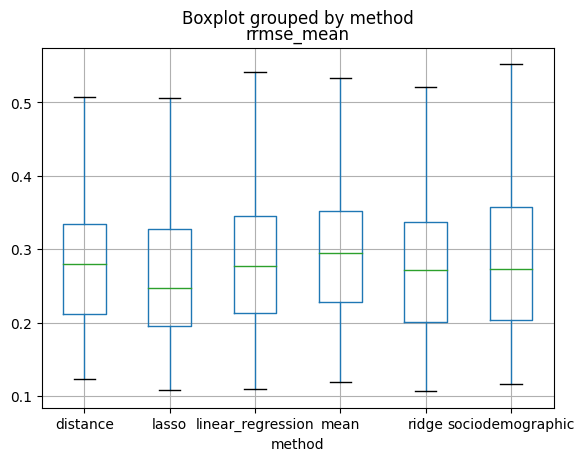

In [ ]:
df_.boxplot(column="rrmse_mean", by="method", showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='method'>

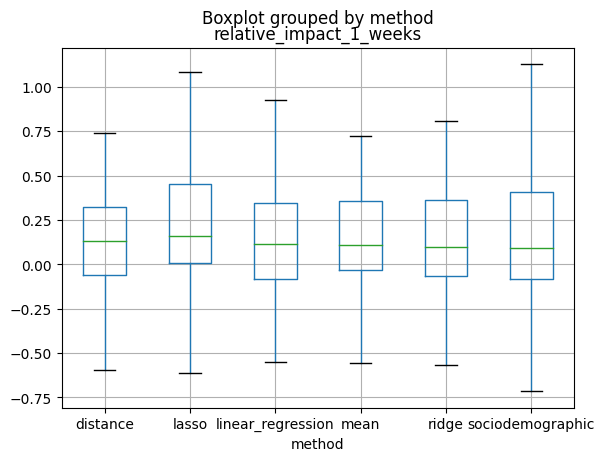

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by="method", showfliers=False)

## Non-protest discourse

In [ ]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_not_protest'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape

(030f420653795bb6561785f5d268d380    6
 be6990e3b0da148fd7d8717a40d79f74    6
 b03164c7bec8fdc74497c43b12692379    6
 b121d9fb76d424faf361a457752159b2    6
 b4db48ac6b81d33d22c4a49d8ebb8ada    6
                                    ..
 4c11d2dd3768c40d4db384b0e584496f    6
 49d4ded1366abc89e6303acd7cbb0647    6
 47c29062c545d5c87f8425c59be58593    6
 45b9a3659658710962c53e9f2772c4c5    6
 ffba329c017ddc16d2b7b3a522e25d22    6
 Name: hash, Length: 137, dtype: int64,
 distance             137
 lasso                137
 linear_regression    137
 mean                 137
 ridge                137
 sociodemographic     137
 Name: method, dtype: int64,
 (822, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='method'>

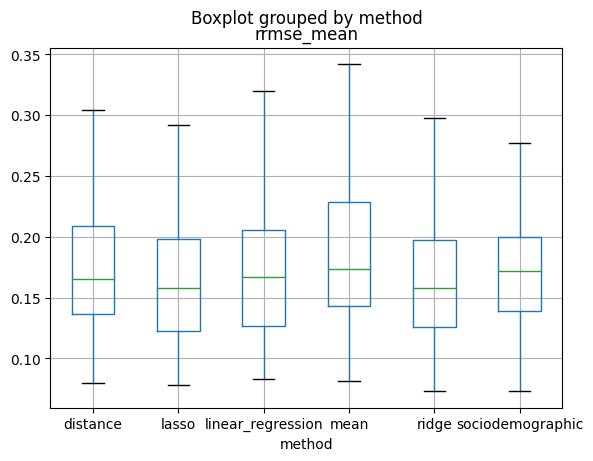

In [ ]:
df_.boxplot(column="rrmse_mean", by="method", showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='method'>

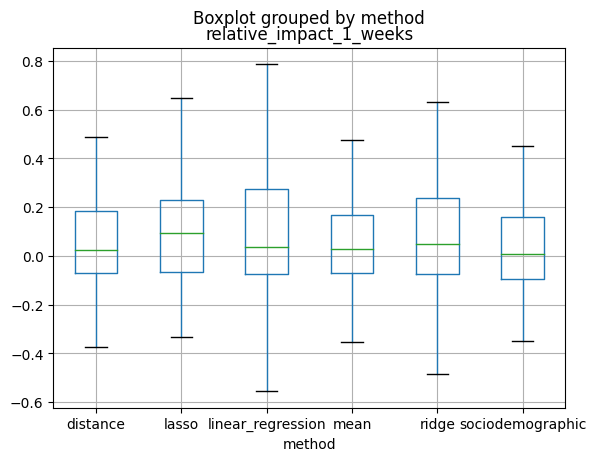

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by="method", showfliers=False)

## Effect of preprocessing

### Weekly aggregation

In [ ]:
df_ = df.copy()
df_a = df_.query("discourse_type == 'climate' & agg_weekly == True")
df_a = df_a.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_a.reset_index(drop=True, inplace=True)
df_b = df_.query("discourse_type == 'climate' & agg_weekly == False")
df_b = df_b.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_b.reset_index(drop=True, inplace=True)
df_ = pd.concat([df_a, df_b], axis=0)
df_["hash"].value_counts(), df_["method"].value_counts(), df_[
    "agg_weekly"
].value_counts(), df_.shape

(030f420653795bb6561785f5d268d380    12
 bf1c123340cd9f46eba95c6241ef3d8f    12
 b121d9fb76d424faf361a457752159b2    12
 b4db48ac6b81d33d22c4a49d8ebb8ada    12
 b69dc4d57e378f464f46a3d641e3e3b7    12
                                     ..
 4cae3179489e30274882f4f68755cd0a    12
 4c11d2dd3768c40d4db384b0e584496f    12
 49d4ded1366abc89e6303acd7cbb0647    12
 47c29062c545d5c87f8425c59be58593    12
 ffba329c017ddc16d2b7b3a522e25d22    12
 Name: hash, Length: 141, dtype: int64,
 distance             282
 lasso                282
 linear_regression    282
 mean                 282
 ridge                282
 sociodemographic     282
 Name: method, dtype: int64,
 True     846
 False    846
 Name: agg_weekly, dtype: int64,
 (1692, 57))

In [ ]:
df_b[["method", "impact_1_weeks"]].head()

,method,impact_1_weeks
0,distance,NaN
1,distance,NaN
2,distance,NaN
3,distance,NaN
4,distance,NaN


<Axes: title={'center': 'rrmse_mean'}, xlabel='agg_weekly'>

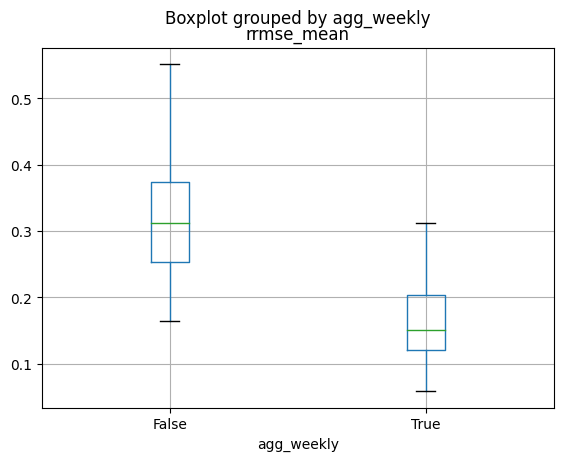

In [ ]:
df_.boxplot(column="rrmse_mean", by="agg_weekly", showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='agg_weekly'>

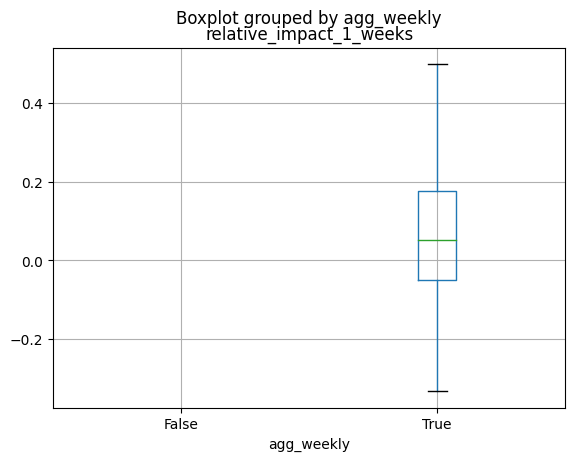

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by="agg_weekly", showfliers=False)

### Autoregressor

In [ ]:
df_ = df.copy()
df_a = df_.query("discourse_type == 'climate' & use_autoregressor == True")
df_a = df_a.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_a.reset_index(drop=True, inplace=True)
df_b = df_.query("discourse_type == 'climate' & use_autoregressor == False")
df_b = df_b.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_b.reset_index(drop=True, inplace=True)
df_ = pd.concat([df_a, df_b], axis=0)
df_["hash"].value_counts(), df_["method"].value_counts(), df_[
    "use_autoregressor"
].value_counts(), df_.shape

(030f420653795bb6561785f5d268d380    6
 bf1c123340cd9f46eba95c6241ef3d8f    6
 b121d9fb76d424faf361a457752159b2    6
 b4db48ac6b81d33d22c4a49d8ebb8ada    6
 b69dc4d57e378f464f46a3d641e3e3b7    6
                                    ..
 4cae3179489e30274882f4f68755cd0a    6
 4c11d2dd3768c40d4db384b0e584496f    6
 49d4ded1366abc89e6303acd7cbb0647    6
 47c29062c545d5c87f8425c59be58593    6
 ffba329c017ddc16d2b7b3a522e25d22    6
 Name: hash, Length: 141, dtype: int64,
 lasso                282
 linear_regression    282
 ridge                282
 Name: method, dtype: int64,
 True     423
 False    423
 Name: use_autoregressor, dtype: int64,
 (846, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='use_autoregressor'>

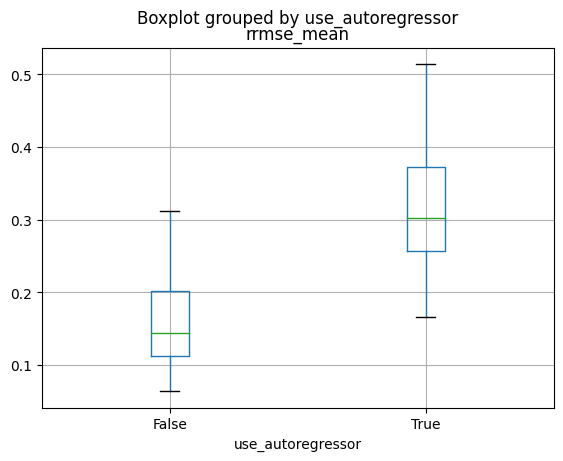

In [ ]:
df_.boxplot(column="rrmse_mean", by="use_autoregressor", showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='use_autoregressor'>

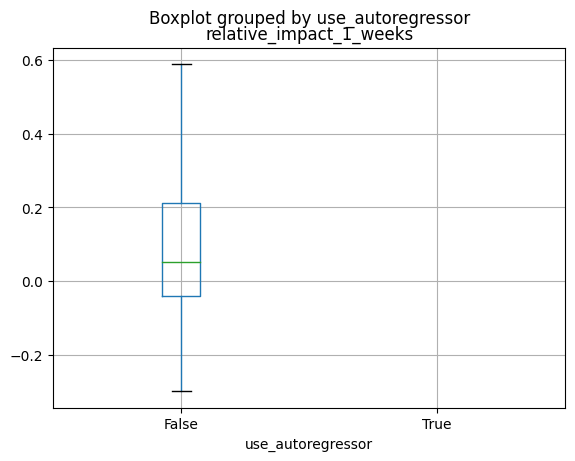

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by="use_autoregressor", showfliers=False)

### Standardization

In [ ]:
df_ = df.copy()
param = "normalize"
dfs = []
for value in df_[param].unique():
    df_a = df_.query(f"discourse_type == 'climate' & {param} == '{value}'")
    df_a = df_a.groupby(["method", "hash"]).apply(
        lambda x: x.sort_values(["rrmse_mean"]).head(1)
    )
    df_a.reset_index(drop=True, inplace=True)
    dfs.append(df_a)
df_ = pd.concat(dfs, axis=0)
df_["hash"].value_counts(), df_["method"].value_counts(), df_[
    param
].value_counts(), df_.shape

(030f420653795bb6561785f5d268d380    24
 bf1c123340cd9f46eba95c6241ef3d8f    24
 b121d9fb76d424faf361a457752159b2    24
 b4db48ac6b81d33d22c4a49d8ebb8ada    24
 b69dc4d57e378f464f46a3d641e3e3b7    24
                                     ..
 4cae3179489e30274882f4f68755cd0a    24
 4c11d2dd3768c40d4db384b0e584496f    24
 49d4ded1366abc89e6303acd7cbb0647    24
 47c29062c545d5c87f8425c59be58593    24
 ffba329c017ddc16d2b7b3a522e25d22    24
 Name: hash, Length: 141, dtype: int64,
 distance             564
 lasso                564
 linear_regression    564
 mean                 564
 ridge                564
 sociodemographic     564
 Name: method, dtype: int64,
 mean        846
 standard    846
 robust      846
 power       846
 Name: normalize, dtype: int64,
 (3384, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='normalize'>

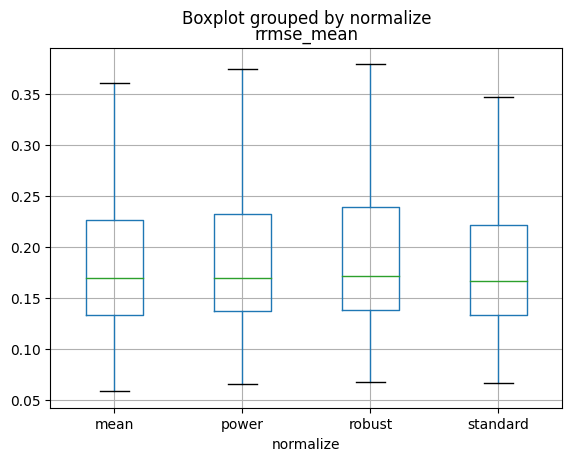

In [ ]:
df_.boxplot(column="rrmse_mean", by=param, showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='normalize'>

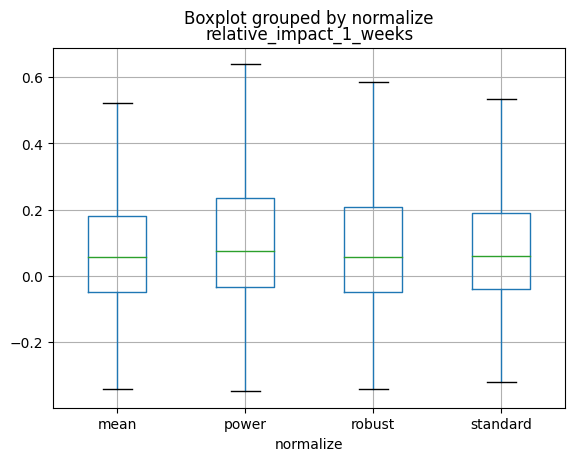

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by=param, showfliers=False)

### (Inverse) distance

In [ ]:
df_ = df.copy()
param = "distance__inverse"
print(df_[param].value_counts())
dfs = []
for value in [True, False]:
    df_a = df_.query(f"{param} == {value}")
    dfs.append(df_a)
df_ = pd.concat(dfs, axis=0)
df_["hash"].value_counts(), df_["method"].value_counts(), df_[
    param
].value_counts(), df_.shape

False    3296
True     3296
Name: distance__inverse, dtype: int64


(6d86e6177f6e279e4adb17442b70dc85    48
 e397f9fde7f9169ca0bbbeb261c5ea9c    48
 1510d1791fb3090296ba0175a13612ea    48
 c9f56f0fa638c971d4821a2660fb5373    48
 e186833e4578db5cc737f5424b4e5a7d    48
                                     ..
 e7471cbb4b88336f44d8d2c09fb38407    16
 4cae3179489e30274882f4f68755cd0a    16
 0842354cc40c1023a33a30c508ceb891    16
 ac17ad52e817aaebf38823086dd5c06a    16
 351c3b34ee7b33d4c1be7aefe53efa80    16
 Name: hash, Length: 145, dtype: int64,
 distance    6592
 Name: method, dtype: int64,
 True     3296
 False    3296
 Name: distance__inverse, dtype: int64,
 (6592, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='distance__inverse'>

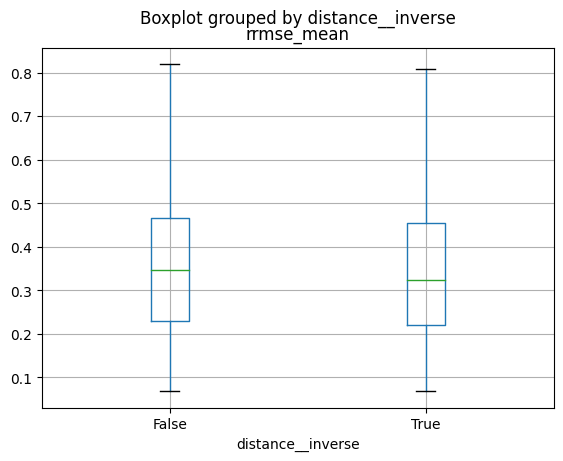

In [ ]:
df_.boxplot(column="rrmse_mean", by=param, showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='distance__inverse'>

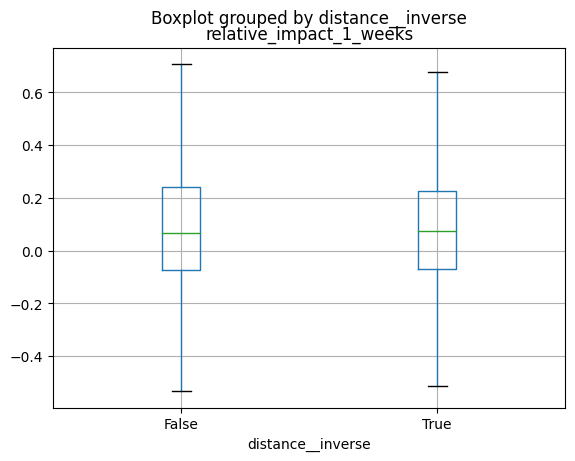

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by=param, showfliers=False)

### Sociodemographic "sum to one"

In [ ]:
df_ = df.copy()
param = "sociodemographic__sum_to_one"
dfs = []
for value in [True, False]:
    df_a = df_.query(f"discourse_type == 'climate' & {param} == {value}")
    df_a = df_a.groupby(["method", "hash"]).apply(
        lambda x: x.sort_values(["rrmse_mean"]).head(1)
    )
    df_a.reset_index(drop=True, inplace=True)
    dfs.append(df_a)
df_ = pd.concat(dfs, axis=0)
df_["hash"].value_counts(), df_["method"].value_counts(), df_[
    param
].value_counts(), df_.shape

(030f420653795bb6561785f5d268d380    2
 bf1c123340cd9f46eba95c6241ef3d8f    2
 b121d9fb76d424faf361a457752159b2    2
 b4db48ac6b81d33d22c4a49d8ebb8ada    2
 b69dc4d57e378f464f46a3d641e3e3b7    2
                                    ..
 4cae3179489e30274882f4f68755cd0a    2
 4c11d2dd3768c40d4db384b0e584496f    2
 49d4ded1366abc89e6303acd7cbb0647    2
 47c29062c545d5c87f8425c59be58593    2
 ffba329c017ddc16d2b7b3a522e25d22    2
 Name: hash, Length: 141, dtype: int64,
 sociodemographic    282
 Name: method, dtype: int64,
 True     141
 False    141
 Name: sociodemographic__sum_to_one, dtype: int64,
 (282, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='sociodemographic__sum_to_one'>

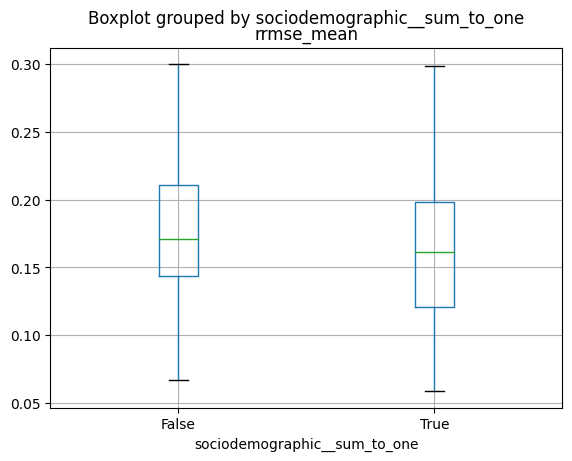

In [ ]:
df_.boxplot(column="rrmse_mean", by=param, showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='sociodemographic__sum_to_one'>

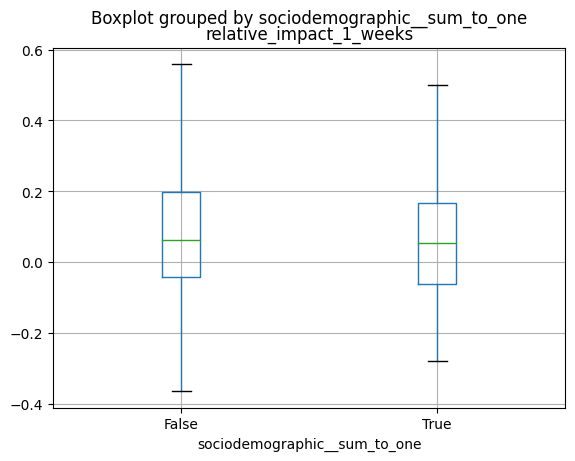

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by=param, showfliers=False)

In [ ]:
df_ = df.copy()
param = "sociodemographic__sum_to_one"
dfs = []
for value in [True, False]:
    df_a = df_.query(
        f"discourse_type == 'climate' & sociodemographic__method == 'nmf' & {param} == {value}"
    )
    df_a = df_a.groupby(["method", "hash"]).apply(
        lambda x: x.sort_values(["rrmse_mean"]).head(1)
    )
    df_a.reset_index(drop=True, inplace=True)
    dfs.append(df_a)
df_ = pd.concat(dfs, axis=0)
df_["hash"].value_counts(), df_["method"].value_counts(), df_[
    param
].value_counts(), df_.shape

(030f420653795bb6561785f5d268d380    2
 bf1c123340cd9f46eba95c6241ef3d8f    2
 b121d9fb76d424faf361a457752159b2    2
 b4db48ac6b81d33d22c4a49d8ebb8ada    2
 b69dc4d57e378f464f46a3d641e3e3b7    2
                                    ..
 4cae3179489e30274882f4f68755cd0a    2
 4c11d2dd3768c40d4db384b0e584496f    2
 49d4ded1366abc89e6303acd7cbb0647    2
 47c29062c545d5c87f8425c59be58593    2
 ffba329c017ddc16d2b7b3a522e25d22    2
 Name: hash, Length: 141, dtype: int64,
 sociodemographic    282
 Name: method, dtype: int64,
 True     141
 False    141
 Name: sociodemographic__sum_to_one, dtype: int64,
 (282, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='sociodemographic__sum_to_one'>

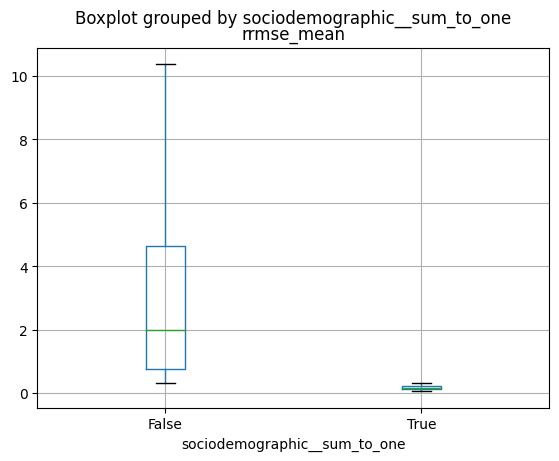

In [ ]:
df_.boxplot(column="rrmse_mean", by=param, showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='sociodemographic__sum_to_one'>

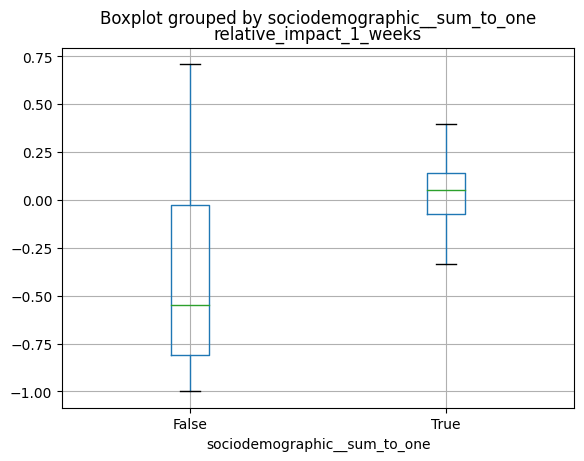

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by=param, showfliers=False)

### Sociodemographic method

In [ ]:
df_ = df.copy()
param = "sociodemographic__method"
dfs = []
for value in df_[param].unique():
    df_a = df_.query(f"discourse_type == 'climate' & {param} == '{value}'")
    df_a = df_a.groupby(["method", "hash"]).apply(
        lambda x: x.sort_values(["rrmse_mean"]).head(1)
    )
    df_a.reset_index(drop=True, inplace=True)
    dfs.append(df_a)
df_ = pd.concat(dfs, axis=0)
df_["hash"].value_counts(), df_["method"].value_counts(), df_[
    param
].value_counts(), df_.shape

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/3493521699.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_a = df_a.groupby(["method", "hash"]).apply(lambda x: x.sort_values(["rrmse_mean"]).head(1))
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/3493521699.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)


(030f420653795bb6561785f5d268d380    5
 bf1c123340cd9f46eba95c6241ef3d8f    5
 b121d9fb76d424faf361a457752159b2    5
 b4db48ac6b81d33d22c4a49d8ebb8ada    5
 b69dc4d57e378f464f46a3d641e3e3b7    5
                                    ..
 4cae3179489e30274882f4f68755cd0a    5
 4c11d2dd3768c40d4db384b0e584496f    5
 49d4ded1366abc89e6303acd7cbb0647    5
 47c29062c545d5c87f8425c59be58593    5
 ffba329c017ddc16d2b7b3a522e25d22    5
 Name: hash, Length: 141, dtype: int64,
 sociodemographic    705
 Name: method, dtype: int64,
 corr    141
 ols     141
 pc      141
 pls     141
 nmf     141
 Name: sociodemographic__method, dtype: int64,
 (705, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='sociodemographic__method'>

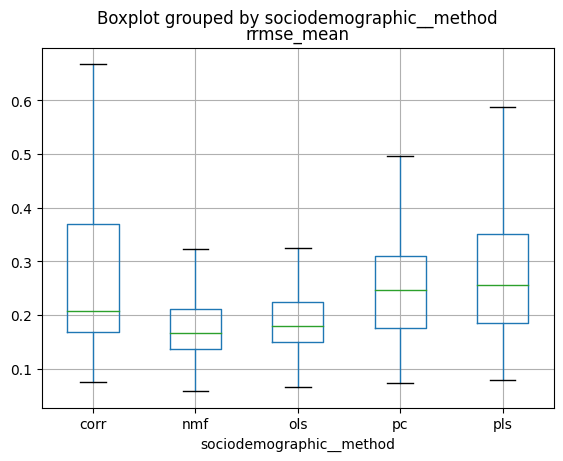

In [ ]:
df_.boxplot(column="rrmse_mean", by=param, showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='sociodemographic__method'>

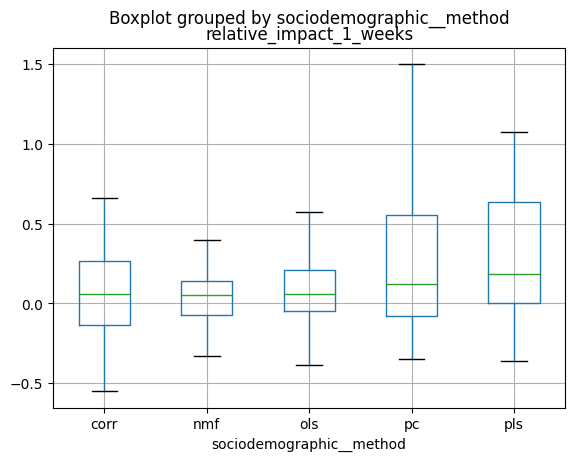

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by=param, showfliers=False)

In [ ]:
df_ = df.copy()
param = "sociodemographic__method"
dfs = []
for value in df_[param].unique():
    df_a = df_.query(
        f"discourse_type == 'climate' & sociodemographic__sum_to_one == True & {param} == '{value}'"
    )
    df_a = df_a.groupby(["method", "hash"]).apply(
        lambda x: x.sort_values(["rrmse_mean"]).head(1)
    )
    df_a.reset_index(drop=True, inplace=True)
    dfs.append(df_a)
df_ = pd.concat(dfs, axis=0)
df_["hash"].value_counts(), df_["method"].value_counts(), df_[
    param
].value_counts(), df_.shape

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/2808758620.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_a = df_a.groupby(["method", "hash"]).apply(lambda x: x.sort_values(["rrmse_mean"]).head(1))
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/2808758620.py:9: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)


(030f420653795bb6561785f5d268d380    5
 bf1c123340cd9f46eba95c6241ef3d8f    5
 b121d9fb76d424faf361a457752159b2    5
 b4db48ac6b81d33d22c4a49d8ebb8ada    5
 b69dc4d57e378f464f46a3d641e3e3b7    5
                                    ..
 4cae3179489e30274882f4f68755cd0a    5
 4c11d2dd3768c40d4db384b0e584496f    5
 49d4ded1366abc89e6303acd7cbb0647    5
 47c29062c545d5c87f8425c59be58593    5
 ffba329c017ddc16d2b7b3a522e25d22    5
 Name: hash, Length: 141, dtype: int64,
 sociodemographic    705
 Name: method, dtype: int64,
 corr    141
 ols     141
 pc      141
 pls     141
 nmf     141
 Name: sociodemographic__method, dtype: int64,
 (705, 57))

<Axes: title={'center': 'rrmse_mean'}, xlabel='sociodemographic__method'>

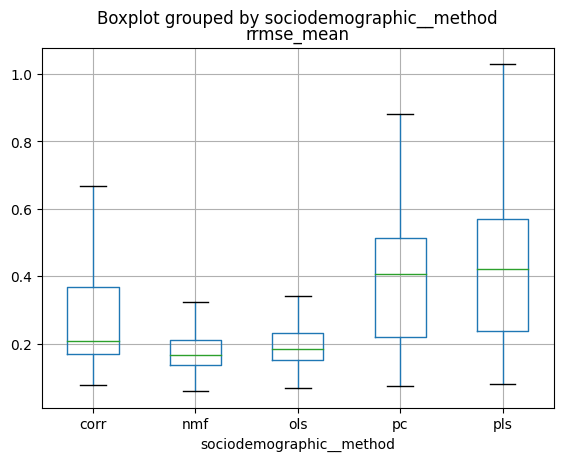

In [ ]:
df_.boxplot(column="rrmse_mean", by=param, showfliers=False)

<Axes: title={'center': 'relative_impact_1_weeks'}, xlabel='sociodemographic__method'>

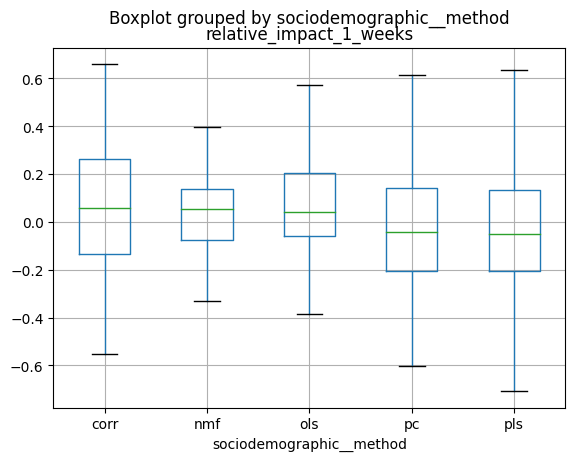

In [ ]:
df_.boxplot(column="relative_impact_1_weeks", by=param, showfliers=False)

## Differences between small and large protests

Now using data where only the best parameters from above are kept, and random forests are added.

In [ ]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(60564, 57)


In [ ]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape
df_ = df_.sort_values(["size"])
bot = df_.iloc[: len(df_) // 3]
mid = df_.iloc[len(df_) // 3 : (len(df_) // 3) * 2]
top = df_.iloc[(len(df_) // 3) * 2 :]
bot.shape, mid.shape, top.shape

((329, 57), (329, 57), (329, 57))

In [ ]:
bot["size"].value_counts(), mid["size"].value_counts(), top["size"].value_counts()

(5.0     98
 6.0     84
 4.0     63
 3.0     35
 7.0     35
 8.0      7
 80.0     7
 Name: size, dtype: int64,
 100.0    245
 80.0      63
 90.0      21
 Name: size, dtype: int64,
 2000.0     56
 10000.0    42
 2500.0     28
 1500.0     21
 3000.0     21
 7000.0      7
 53000.0     7
 36000.0     7
 25000.0     7
 20500.0     7
 20000.0     7
 17000.0     7
 11000.0     7
 10500.0     7
 9750.0      7
 6000.0      7
 6500.0      7
 1750.0      7
 5700.0      7
 5000.0      7
 4500.0      7
 3500.0      7
 2650.0      7
 2300.0      7
 2200.0      7
 2100.0      7
 1900.0      7
 55000.0     7
 Name: size, dtype: int64)

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/784766906.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/784766906.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/784766906.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)


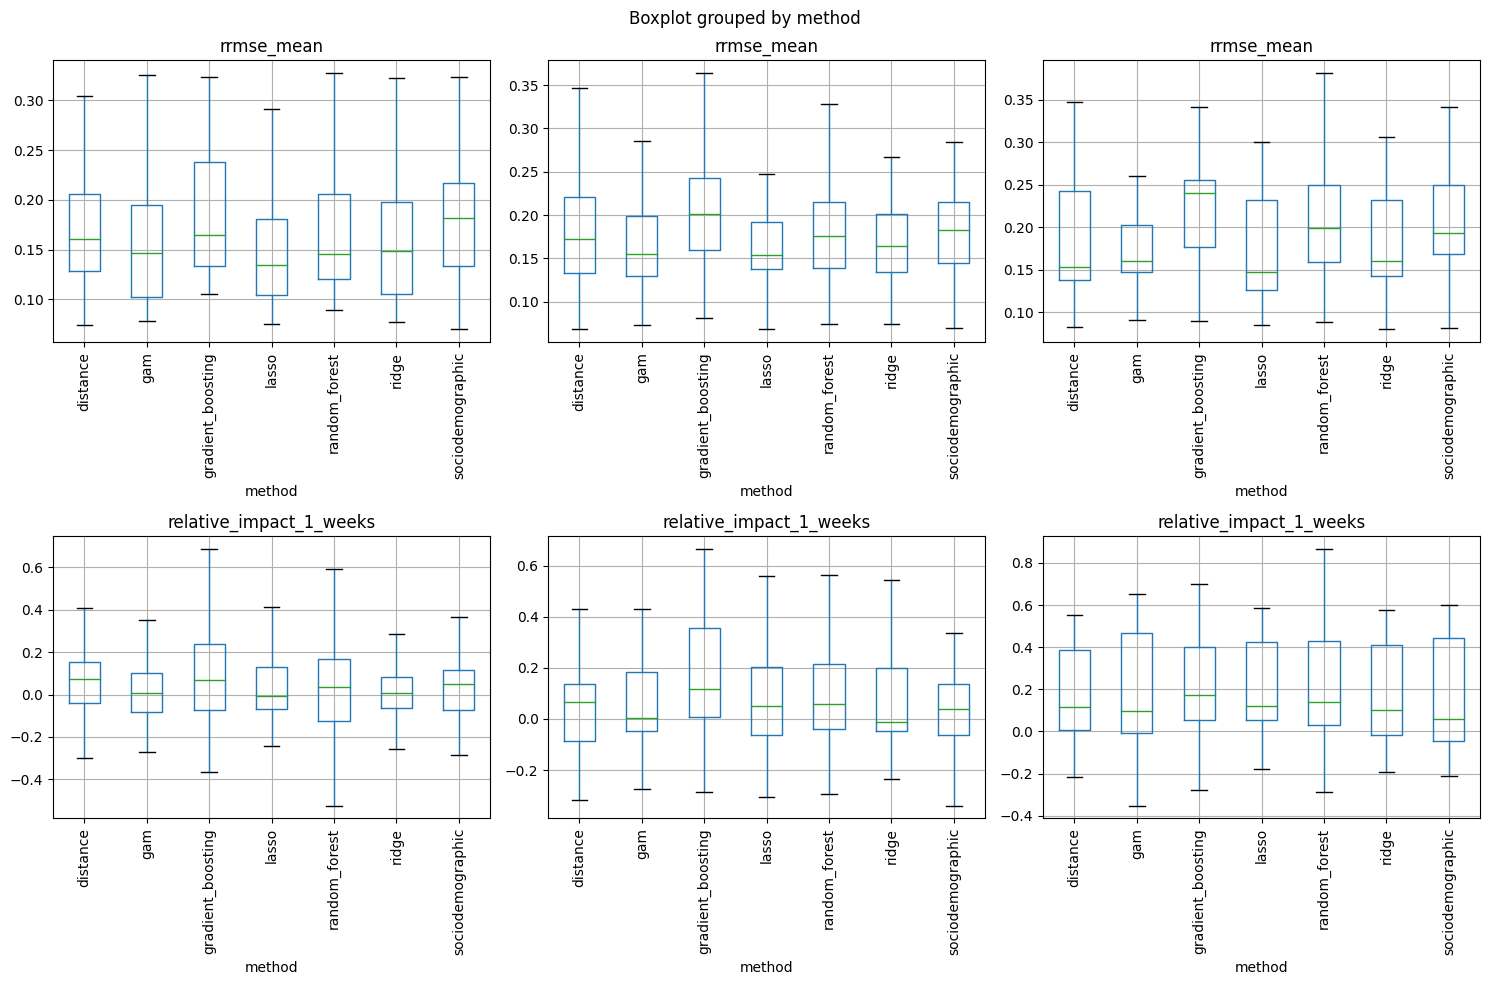

In [ ]:
import matplotlib.pyplot as plt

param = "method"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in df_[param].unique():
        df_a = df_.query(f"discourse_type == 'climate' & {param} == '{value}'")
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse_mean"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse_mean", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_1_weeks",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

In [ ]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_and_protest'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape
df_ = df_.sort_values(["size"])
bot = df_.iloc[: len(df_) // 3]
mid = df_.iloc[len(df_) // 3 : (len(df_) // 3) * 2]
top = df_.iloc[(len(df_) // 3) * 2 :]
bot.shape, mid.shape, top.shape

((312, 57), (312, 57), (314, 57))

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/1822653353.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/1822653353.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/1822653353.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)


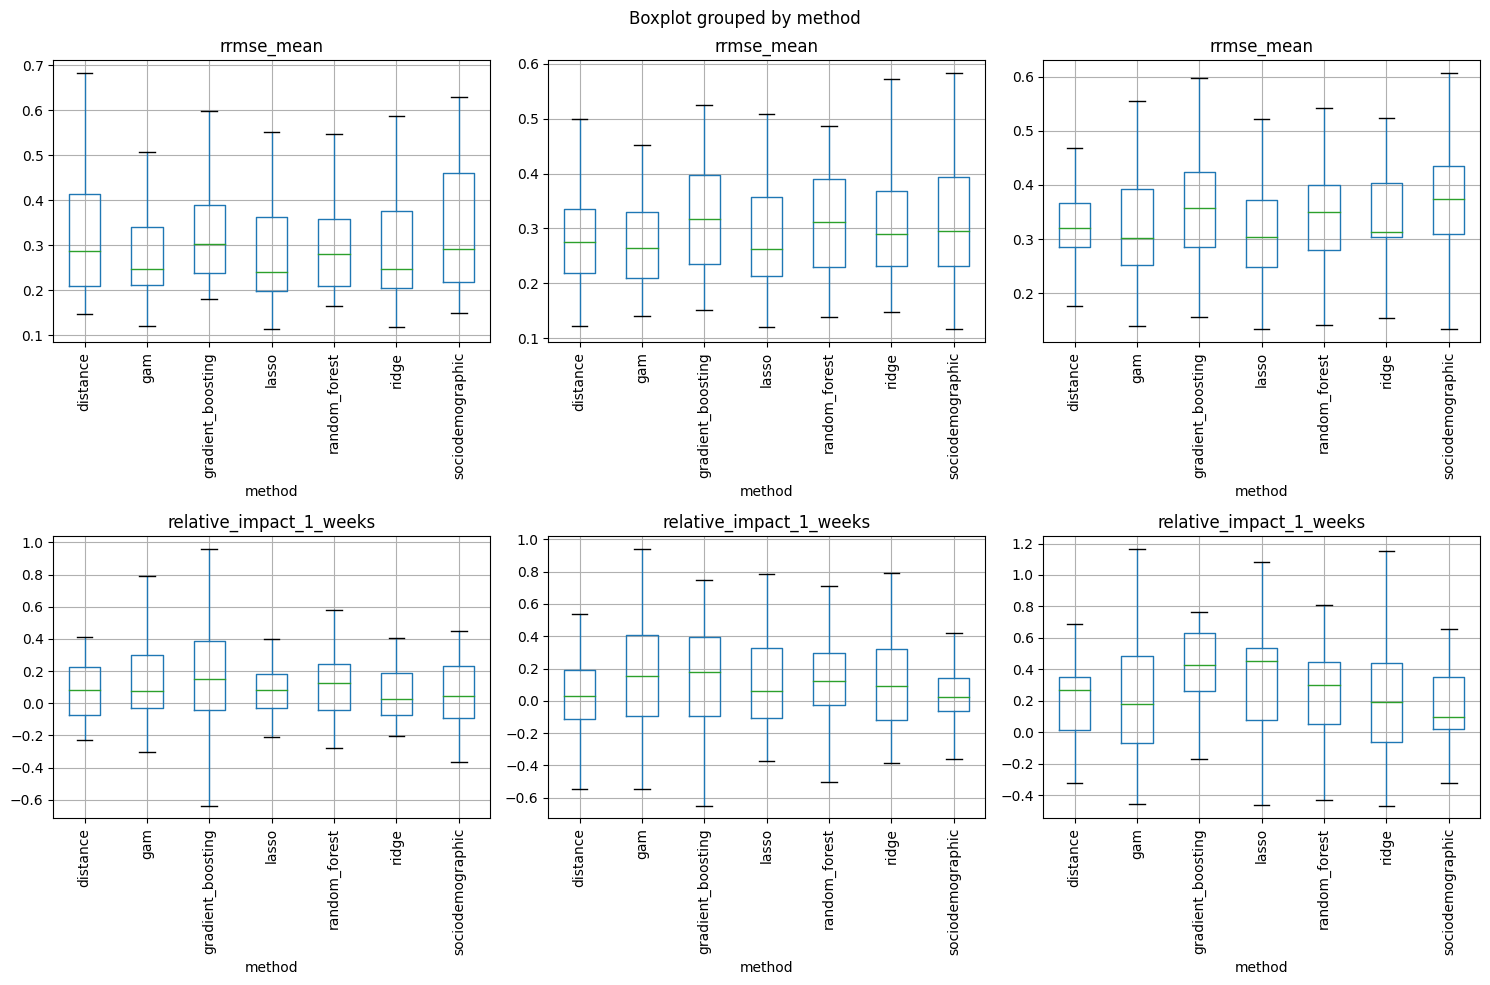

In [ ]:
import matplotlib.pyplot as plt

param = "method"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in df_[param].unique():
        df_a = df_.query(
            f"discourse_type == 'climate_and_protest' & {param} == '{value}'"
        )
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse_mean"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse_mean", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_1_weeks",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

## With BSTS

In [ ]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(3948, 53)


In [ ]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape
df_ = df_.sort_values(["size"])
bot = df_.iloc[: len(df_) // 3]
mid = df_.iloc[len(df_) // 3 : (len(df_) // 3) * 2]
top = df_.iloc[(len(df_) // 3) * 2 :]
bot.shape, mid.shape, top.shape

((26, 53), (26, 53), (26, 53))

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/3030030010.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/3030030010.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/3030030010.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)


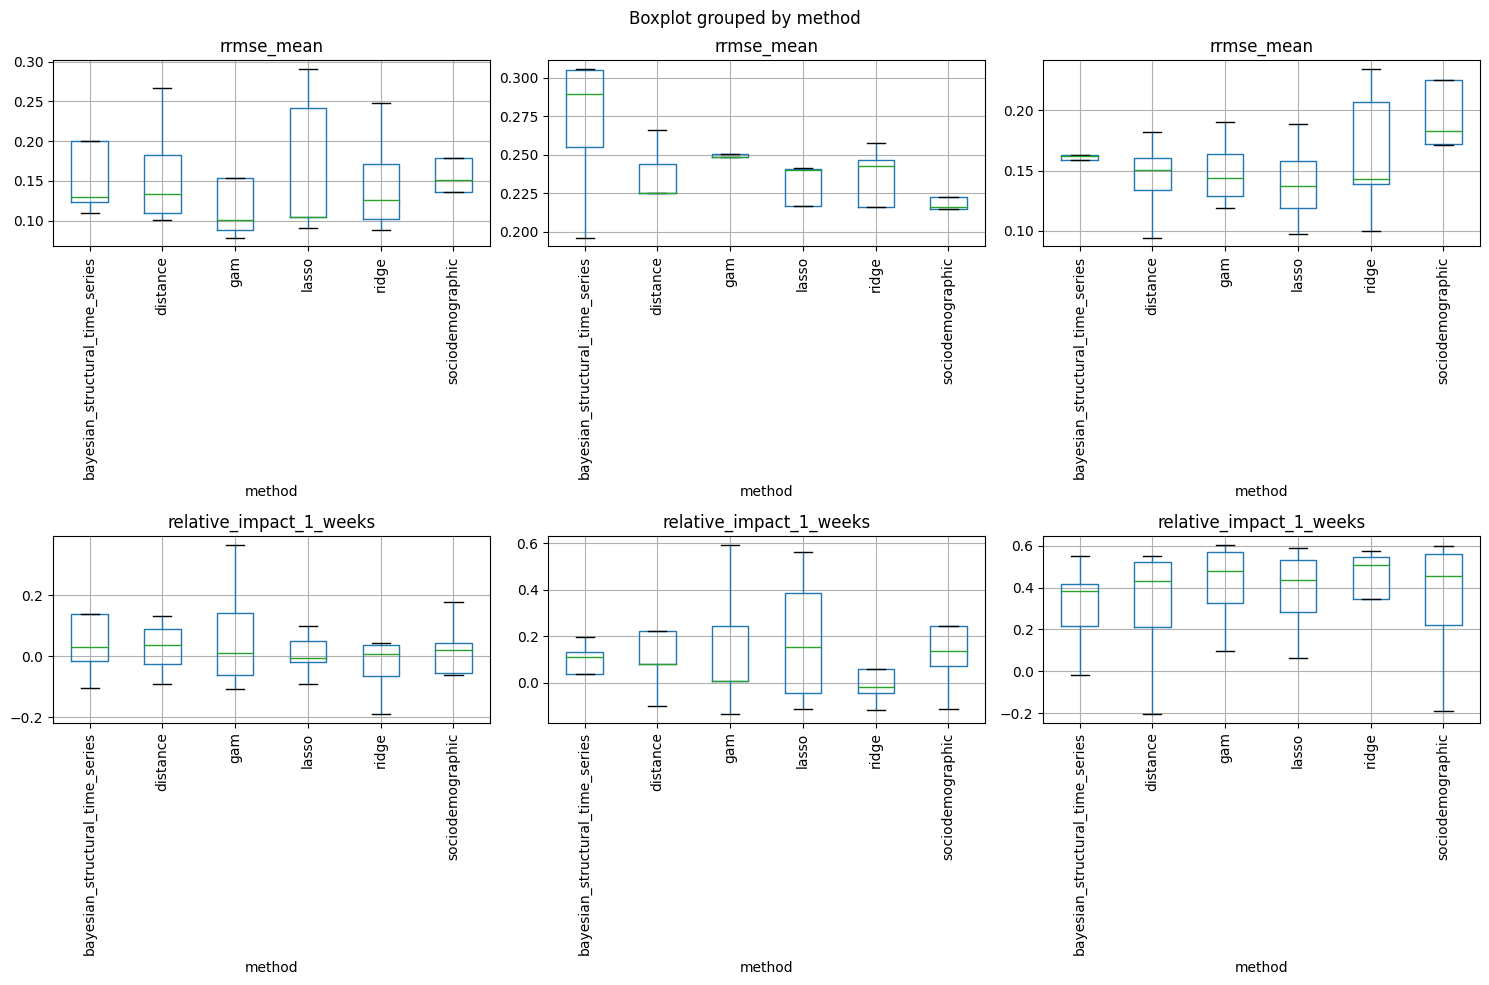

In [ ]:
import matplotlib.pyplot as plt

param = "method"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # , sharey=True)
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in df_[param].unique():
        df_a = df_.query(f"discourse_type == 'climate' & {param} == '{value}'")
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse_mean"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse_mean", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_1_weeks",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

In [ ]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_and_protest'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape
df_ = df_.sort_values(["size"])
bot = df_.iloc[: len(df_) // 3]
mid = df_.iloc[len(df_) // 3 : (len(df_) // 3) * 2]
top = df_.iloc[(len(df_) // 3) * 2 :]
bot.shape, mid.shape, top.shape

((32, 53), (32, 53), (32, 53))

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/1165263106.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/1165263106.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_30014/1165263106.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)


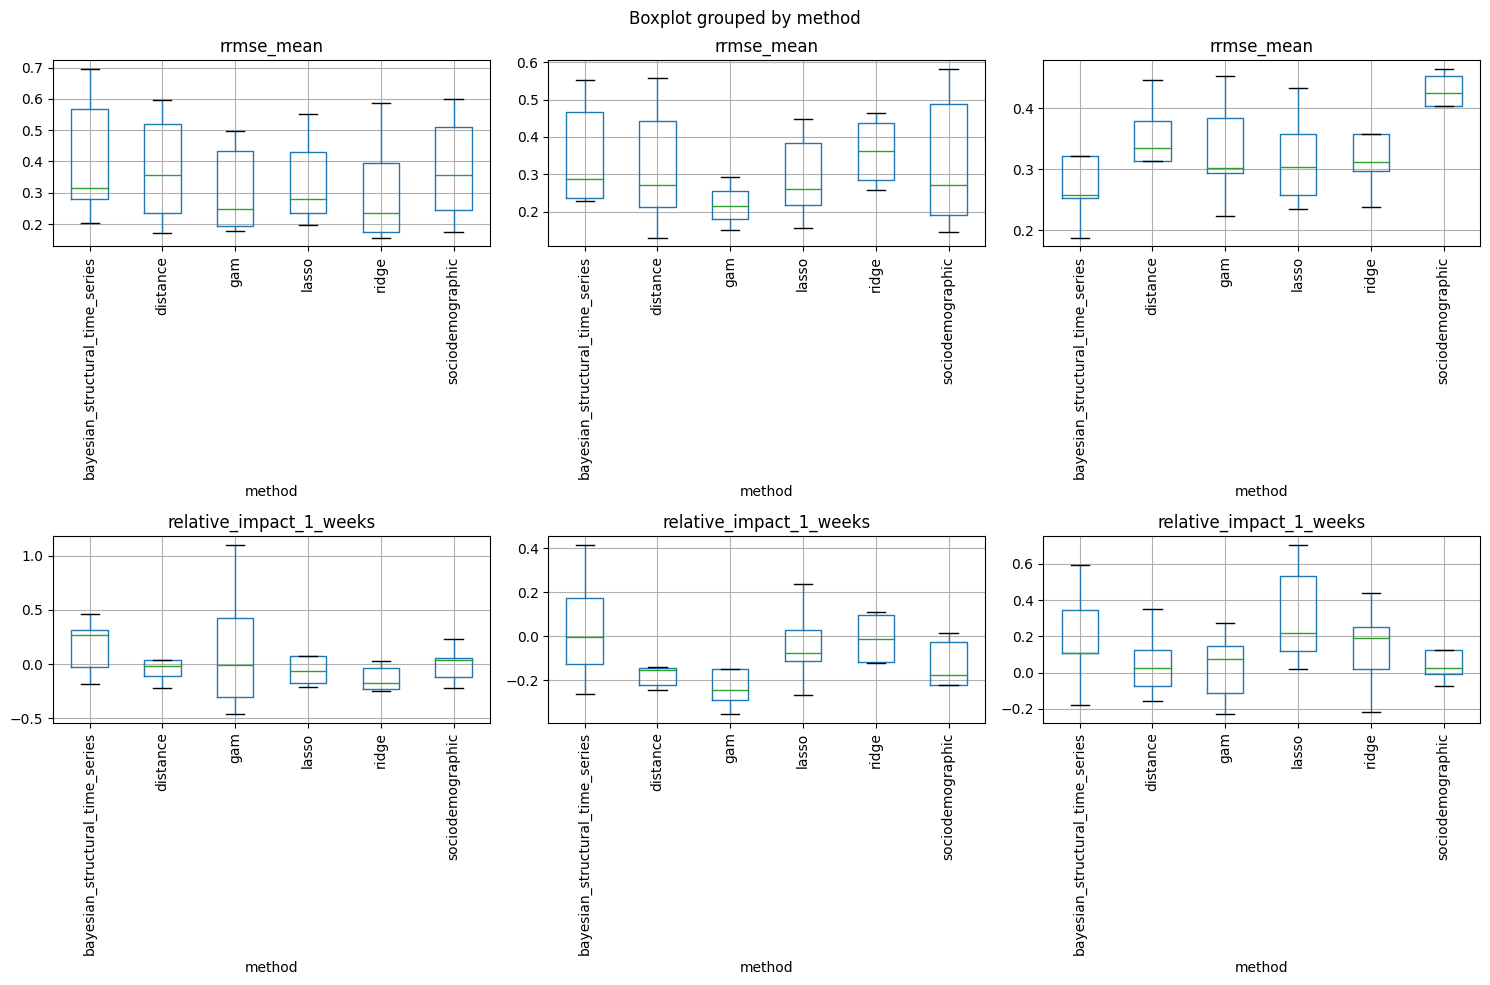

In [ ]:
import matplotlib.pyplot as plt

param = "method"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # , sharey=True)
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in df_[param].unique():
        df_a = df_.query(
            f"discourse_type == 'climate_and_protest' & {param} == '{value}'"
        )
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse_mean"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse_mean", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_1_weeks",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(53148, 52)


In [ ]:
df_ = df.copy()
df_ = df_.sort_values(["size"])
bot = df_.iloc[: len(df_) // 3]
mid = df_.iloc[len(df_) // 3 : (len(df_) // 3) * 2]
top = df_.iloc[(len(df_) // 3) * 2 :]
bot.shape, mid.shape, top.shape

((17716, 52), (17716, 52), (17716, 52))

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_31037/3030030010.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_31037/3030030010.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_31037/3030030010.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)


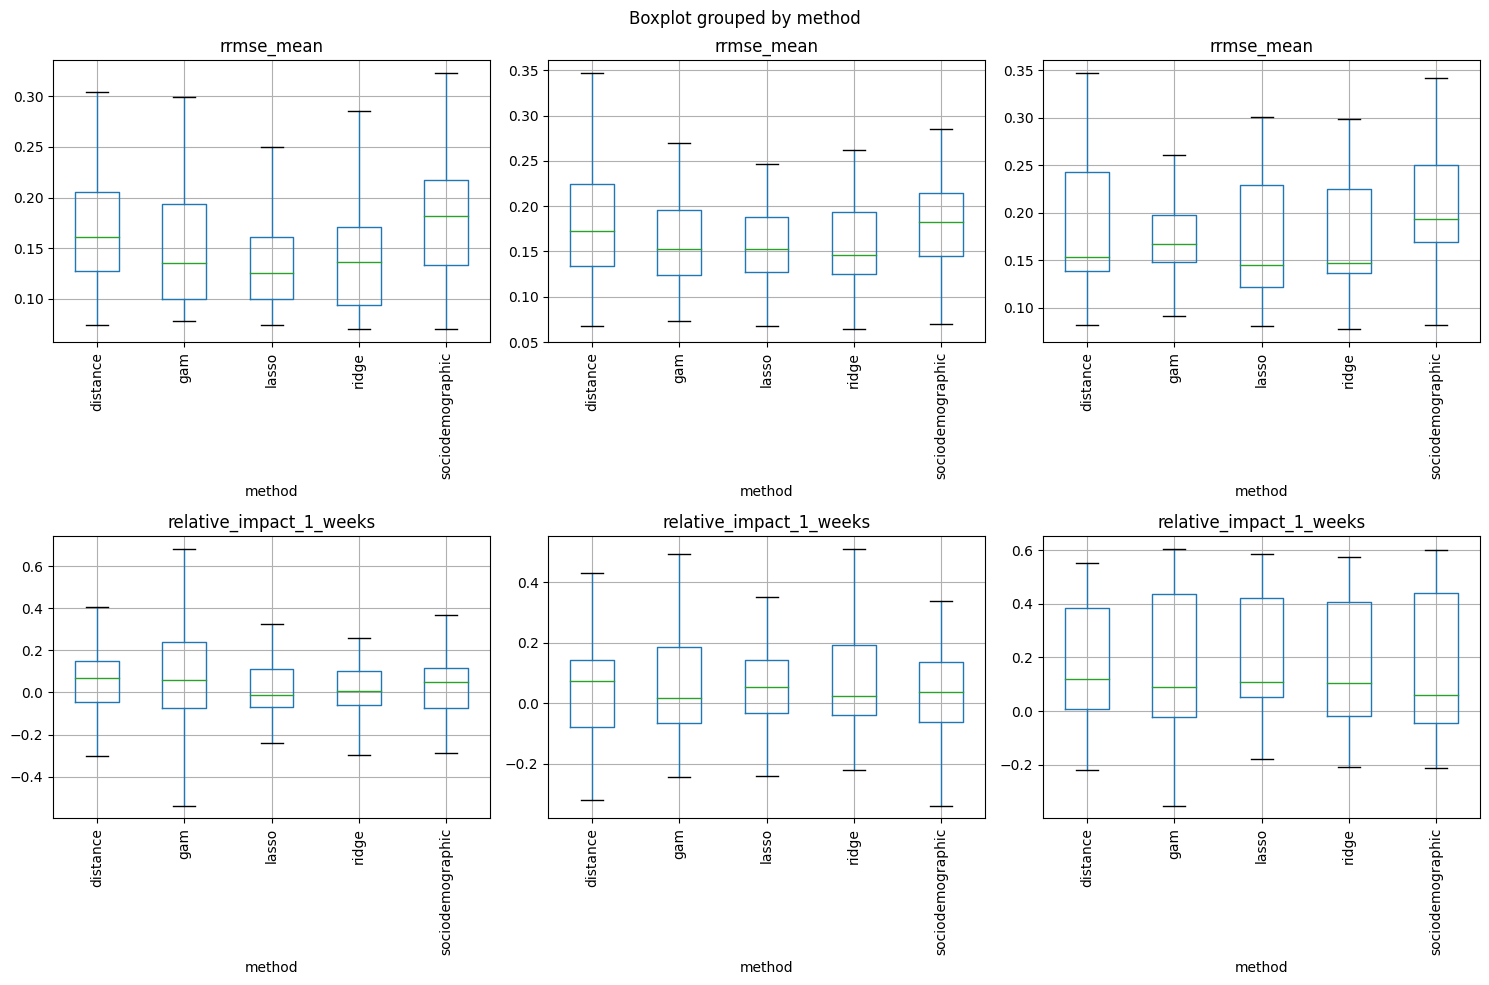

In [ ]:
import matplotlib.pyplot as plt

param = "method"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # , sharey=True)
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in df_[param].unique():
        df_a = df_.query(f"discourse_type == 'climate' & {param} == '{value}'")
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse_mean"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse_mean", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_1_weeks",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

### Effect of interpretability

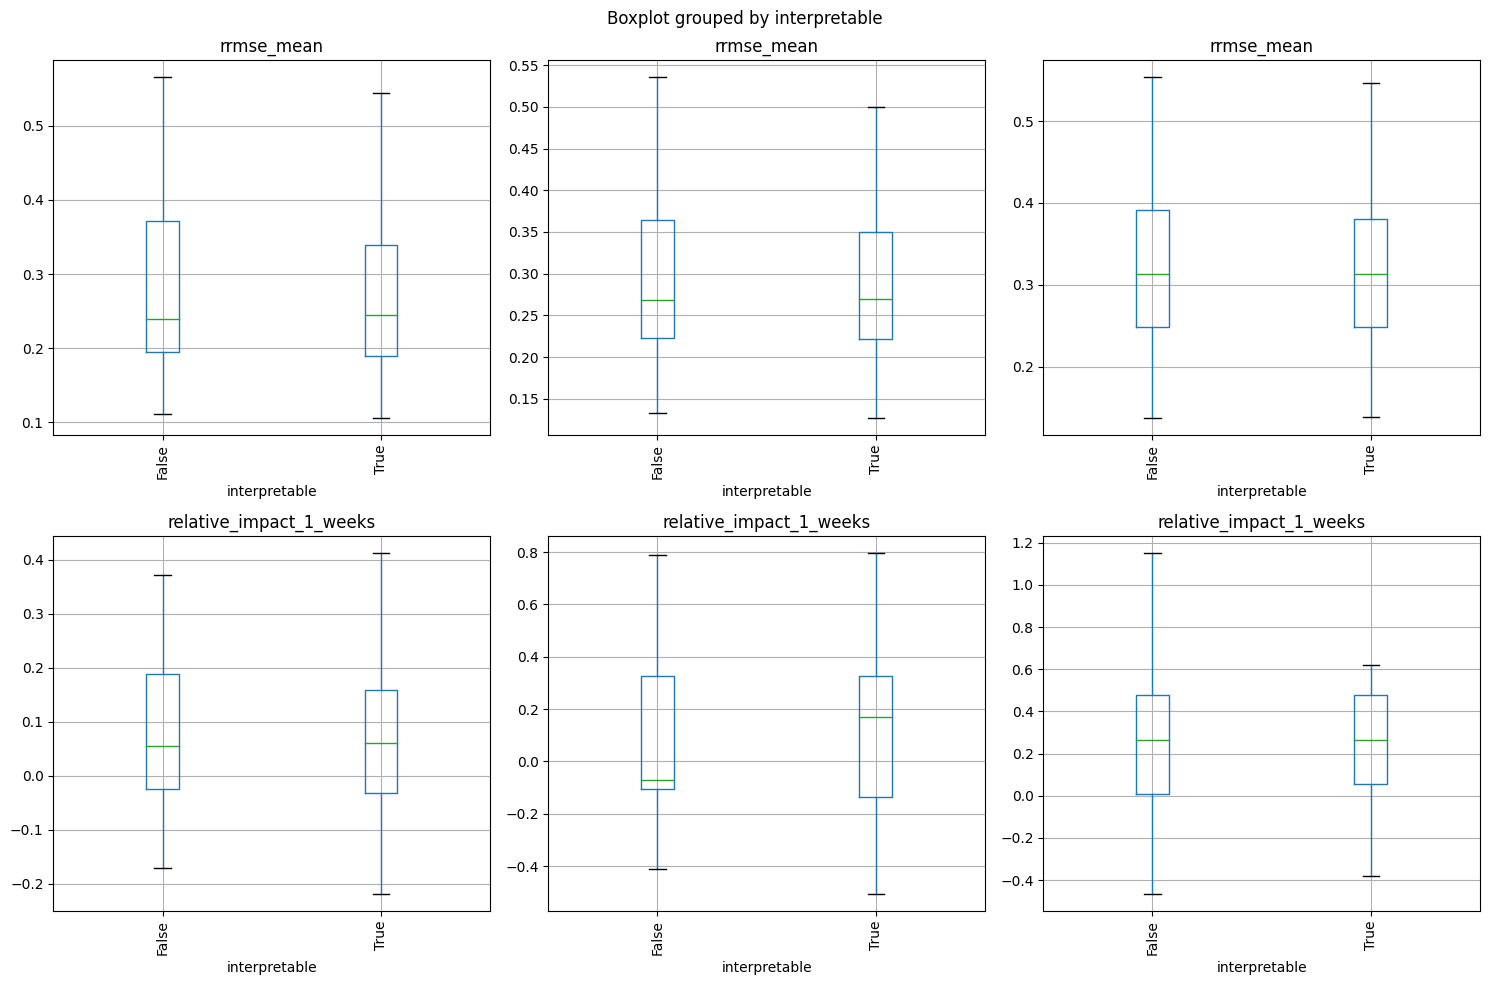

In [ ]:
param = "interpretable"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # , sharey=True)
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in [True, False]:
        df_a = df_.query(
            f"discourse_type == 'climate_and_protest' & method == 'ridge' & {param} == {value}"
        )
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse_mean"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse_mean", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_1_weeks",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

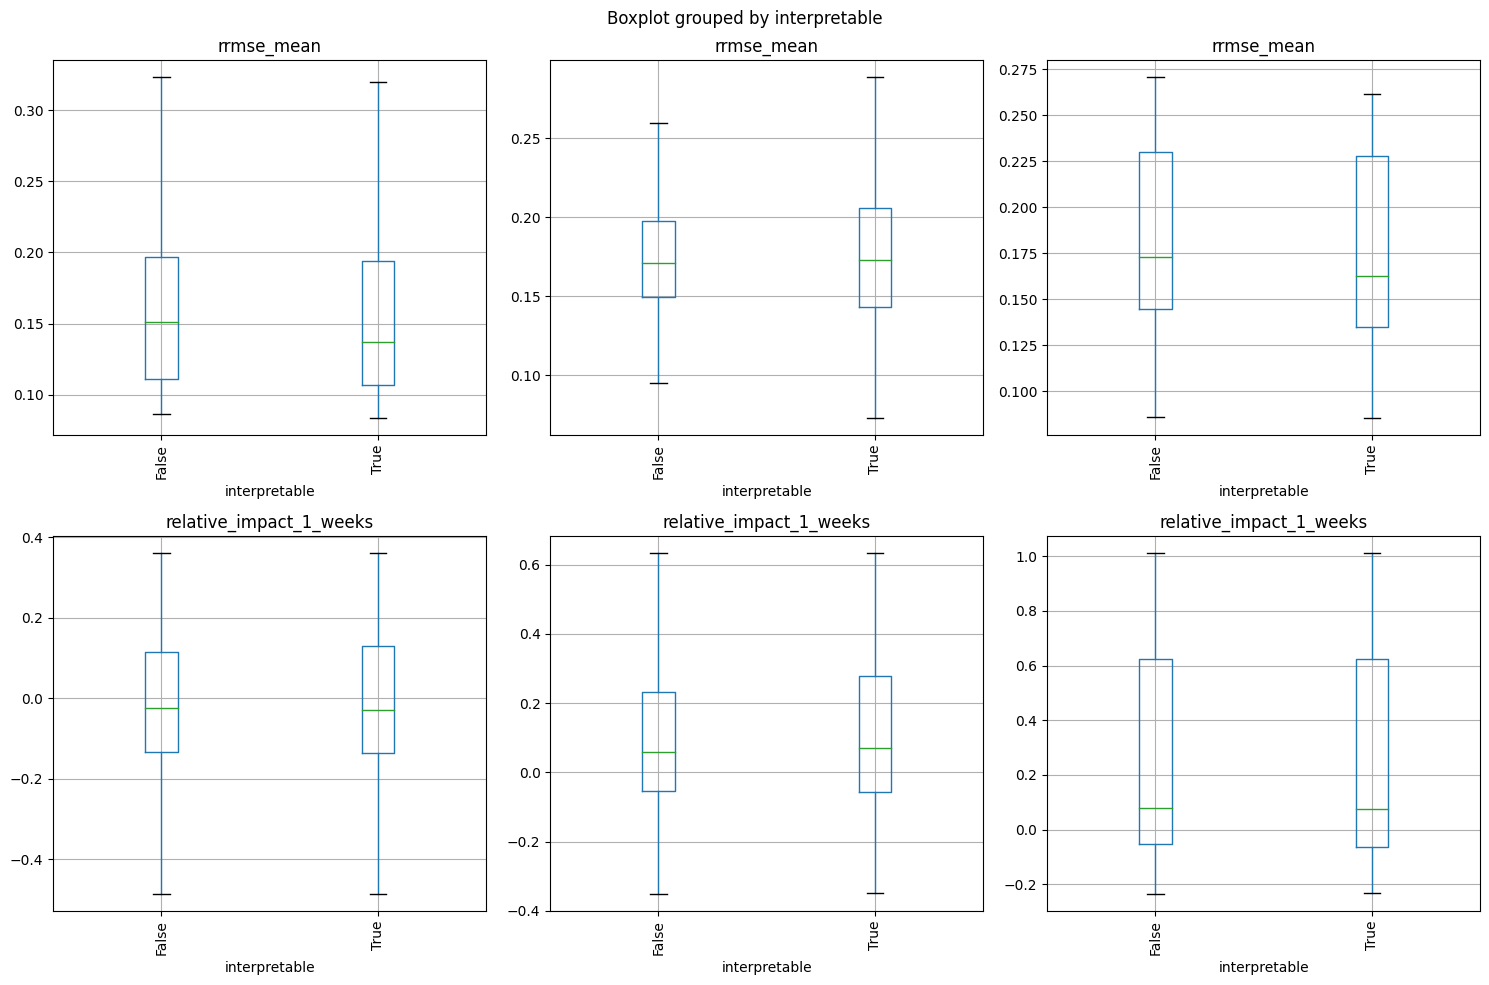

In [ ]:
param = "interpretable"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # , sharey=True)
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in [True, False]:
        df_a = df_.query(
            f"discourse_type == 'climate_not_protest' & method == 'ridge' & {param} == {value}"
        )
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse_mean"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse_mean", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_1_weeks",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

## All climate protest data

In [152]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(208971, 52)


In [153]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape

(0008ae64337cb59801bcb4aeb5b01118    5
 ae23f542aa81a4e90613b3a376a89333    5
 abb727096e8014a561a1cfea8e4d821f    5
 abbaddf7f3897f7648c425256d798062    5
 ac17ad52e817aaebf38823086dd5c06a    5
                                    ..
 5b40ca56c8f45c2f055b97ec1cc4bc34    5
 5b7b53441988c6b6e00a57c9f3bff65d    5
 5bdb5bff253c5884a9ab5c9e616a77e4    5
 5be36700b295098271b8aa2afac084f6    5
 ffefd81c770862db89f165d8131cc81e    5
 Name: hash, Length: 749, dtype: int64,
 distance            749
 gam                 749
 lasso               749
 ridge               749
 sociodemographic    749
 Name: method, dtype: int64,
 (3745, 52))

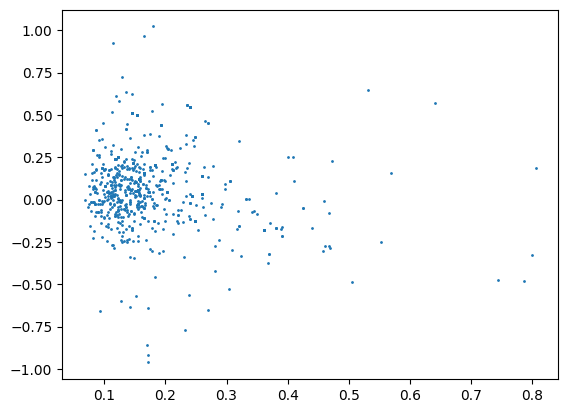

In [154]:
import matplotlib.pyplot as plt

df_ = df_.query("method == 'lasso'")
plt.scatter(df_["rrmse_mean"], df_["relative_impact_1_weeks"], s=1)

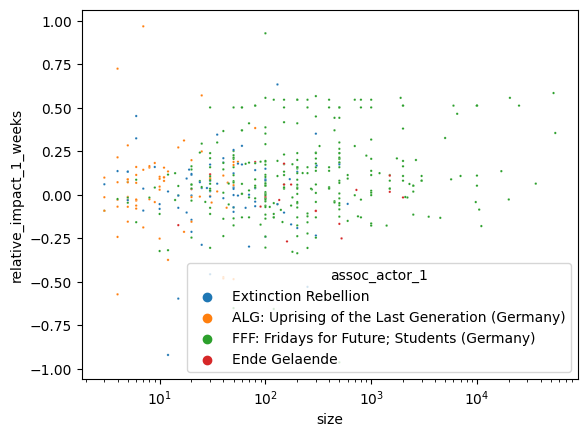

In [155]:
import seaborn as sns

sns.scatterplot(
    data=df_, x="size", y="relative_impact_1_weeks", hue="assoc_actor_1", s=3
)
plt.xscale("log")

### Modelling


In [156]:
regdf = df_[["size", "relative_impact_1_weeks", "assoc_actor_1", "weekday"]]
regdf = regdf.rename(
    columns={
        "assoc_actor_1": "actor",
        "weekday": "day",
        "relative_impact_1_weeks": "impact",
    }
)
regdf = regdf.drop(columns=["day"])
regdf.head()

,size,impact,actor
1498,NaN,0.515482,Extinction Rebellion
1499,NaN,0.290085,ALG: Uprising of the Last Generation (Germany)
1500,1000.0,0.206302,FFF: Fridays for Future; Students (Germany)
1501,NaN,0.501499,FFF: Fridays for Future; Students (Germany)
1502,175.0,-0.170018,Extinction Rebellion


In [157]:
# regdf = pd.get_dummies(regdf, columns=["actor", "day"])
regdf = pd.get_dummies(regdf, columns=["actor"])
regdf.head()

,size,impact,actor_ALG: Uprising of the Last Generation (Germany),actor_Ende Gelaende,actor_Extinction Rebellion,actor_FFF: Fridays for Future; Students (Germany)
1498,NaN,0.515482,0,0,1,0
1499,NaN,0.290085,1,0,0,0
1500,1000.0,0.206302,0,0,0,1
1501,NaN,0.501499,0,0,0,1
1502,175.0,-0.170018,0,0,1,0


In [158]:
import numpy as np

regdf = regdf[~regdf["size"].isna()]
regdf["size"] = np.log2(regdf["size"])
regdf.head()

,size,impact,actor_ALG: Uprising of the Last Generation (Germany),actor_Ende Gelaende,actor_Extinction Rebellion,actor_FFF: Fridays for Future; Students (Germany)
1500,9.965784,0.206302,0,0,0,1
1502,7.451211,-0.170018,0,0,1,0
1503,9.228819,0.092937,0,0,0,1
1504,4.087463,-0.212942,1,0,0,0
1506,9.228819,0.113306,0,0,0,1


<Axes: >

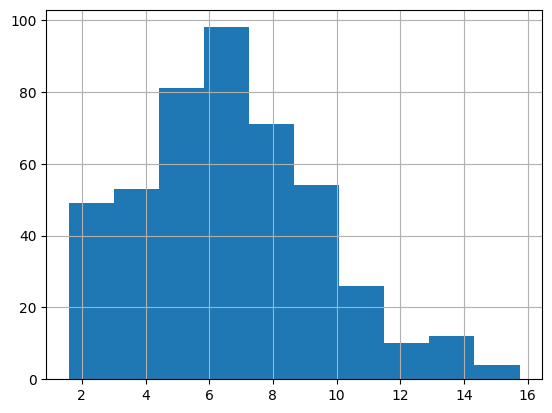

In [159]:
regdf["size"].hist()

In [160]:
# add interaction terms between size and actor and size and day
for actor in regdf.columns:
    if actor.startswith("actor"):
        regdf[f"size*{actor}"] = regdf["size"] * regdf[actor]
        regdf = regdf.drop(columns=[actor])
regdf = regdf.drop(columns=["size"])
# for day in regdf.columns:
#     if day.startswith("day"):
#         regdf[f"size*{day}"] = regdf["size"] * regdf[day]
pd.set_option("display.max_columns", None)
regdf.head(20)

,impact,size*actor_ALG: Uprising of the Last Generation (Germany),size*actor_Ende Gelaende,size*actor_Extinction Rebellion,size*actor_FFF: Fridays for Future; Students (Germany)
1500,0.206302,0.000000,0.000000,0.000000,9.965784
1502,-0.170018,0.000000,0.000000,7.451211,0.000000
1503,0.092937,0.000000,0.000000,0.000000,9.228819
1504,-0.212942,4.087463,0.000000,0.000000,0.000000
1506,0.113306,0.000000,0.000000,0.000000,9.228819
1508,-0.092087,0.000000,0.000000,0.000000,1.584963
1509,0.158278,0.000000,0.000000,0.000000,8.643856
1510,0.345269,0.000000,0.000000,5.129283,0.000000
1511,-0.287425,0.000000,0.000000,4.643856,0.000000
1513,-0.067726,0.000000,6.491853,0.000000,0.000000


In [161]:
# regression
import statsmodels.api as sm

X = regdf.drop(columns=["impact"])
y = regdf["impact"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 impact   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     7.281
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.09e-05
Time:                        12:35:44   Log-Likelihood:                 27.374
No. Observations:                 458   AIC:                            -44.75
Df Residuals:                     453   BIC:                            -24.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

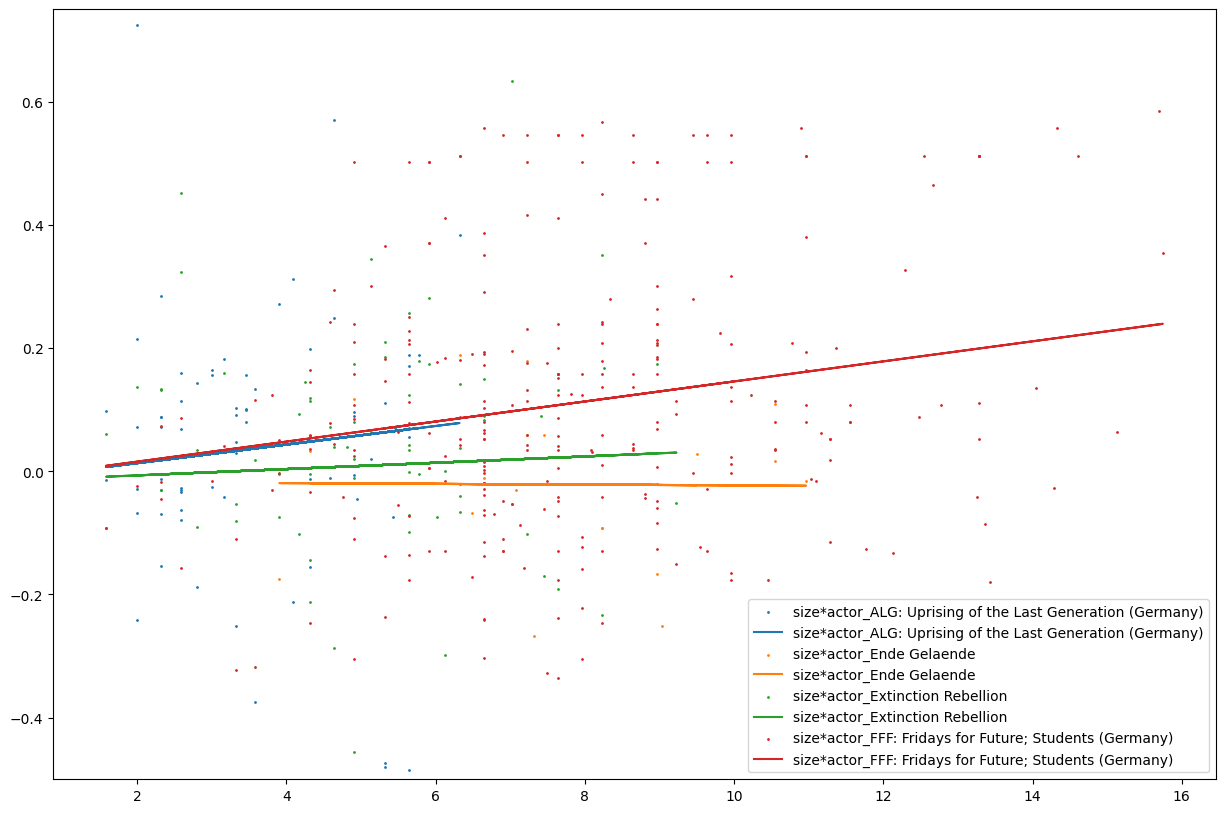

In [162]:
# plot the regression lines
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for actor in regdf.columns:
    if "actor" in actor:
        regdf_ = regdf[regdf[actor] > 0]
        ax.scatter(regdf_[actor], regdf_["impact"], s=1, label=actor)
        ax.plot(
            regdf_[actor],
            results.params[actor] * regdf_[actor] + results.params["const"],
            label=actor,
        )
ax.set_ylim(-0.5, 0.75)
ax.legend()

In [163]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_and_protest' & method == 'lasso'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
regdf = df_[["size", "relative_impact_1_weeks", "assoc_actor_1"]]
regdf = regdf.rename(
    columns={"assoc_actor_1": "actor", "relative_impact_1_weeks": "impact"}
)
regdf.head()

,size,impact,actor
0,NaN,0.480349,Extinction Rebellion
1,NaN,0.255985,ALG: Uprising of the Last Generation (Germany)
2,1000.0,-0.360086,FFF: Fridays for Future; Students (Germany)
3,NaN,0.453437,FFF: Fridays for Future; Students (Germany)
4,175.0,0.189556,Extinction Rebellion


In [164]:
regdf = pd.get_dummies(regdf, columns=["actor"])

regdf = regdf[~regdf["size"].isna()]
regdf["size"] = np.log2(regdf["size"])

for actor in regdf.columns:
    if actor.startswith("actor"):
        regdf[f"size*{actor}"] = regdf["size"] * regdf[actor]
        regdf = regdf.drop(columns=[actor])
regdf = regdf.drop(columns=["size"])

regdf.describe()

,impact,size*actor_ALG: Uprising of the Last Generation (Germany),size*actor_Ende Gelaende,size*actor_Extinction Rebellion,size*actor_FFF: Fridays for Future; Students (Germany)
count,458.000000,458.000000,458.000000,458.000000,458.000000
mean,0.169570,0.534157,0.316440,0.849337,5.028460
std,0.379196,1.354071,1.574391,2.057508,4.295407
min,-0.731827,0.000000,0.000000,0.000000,0.000000
25%,-0.080072,0.000000,0.000000,0.000000,0.000000
50%,0.154990,0.000000,0.000000,0.000000,5.906891
75%,0.377282,0.000000,0.000000,0.000000,8.228819
max,2.592601,6.321928,10.965784,9.228819,15.747144


In [165]:
# check for nans
regdf.isna().sum()

impact                                                       0
size*actor_ALG: Uprising of the Last Generation (Germany)    0
size*actor_Ende Gelaende                                     0
size*actor_Extinction Rebellion                              0
size*actor_FFF: Fridays for Future; Students (Germany)       0
dtype: int64

In [166]:
# remove nans in impact
regdf = regdf[~regdf["impact"].isna()]

In [167]:
X = regdf.drop(columns=["impact"])
y = regdf["impact"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 impact   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.503
Date:                Tue, 09 May 2023   Prob (F-statistic):           0.000247
Time:                        12:35:45   Log-Likelihood:                -194.38
No. Observations:                 458   AIC:                             398.8
Df Residuals:                     453   BIC:                             419.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

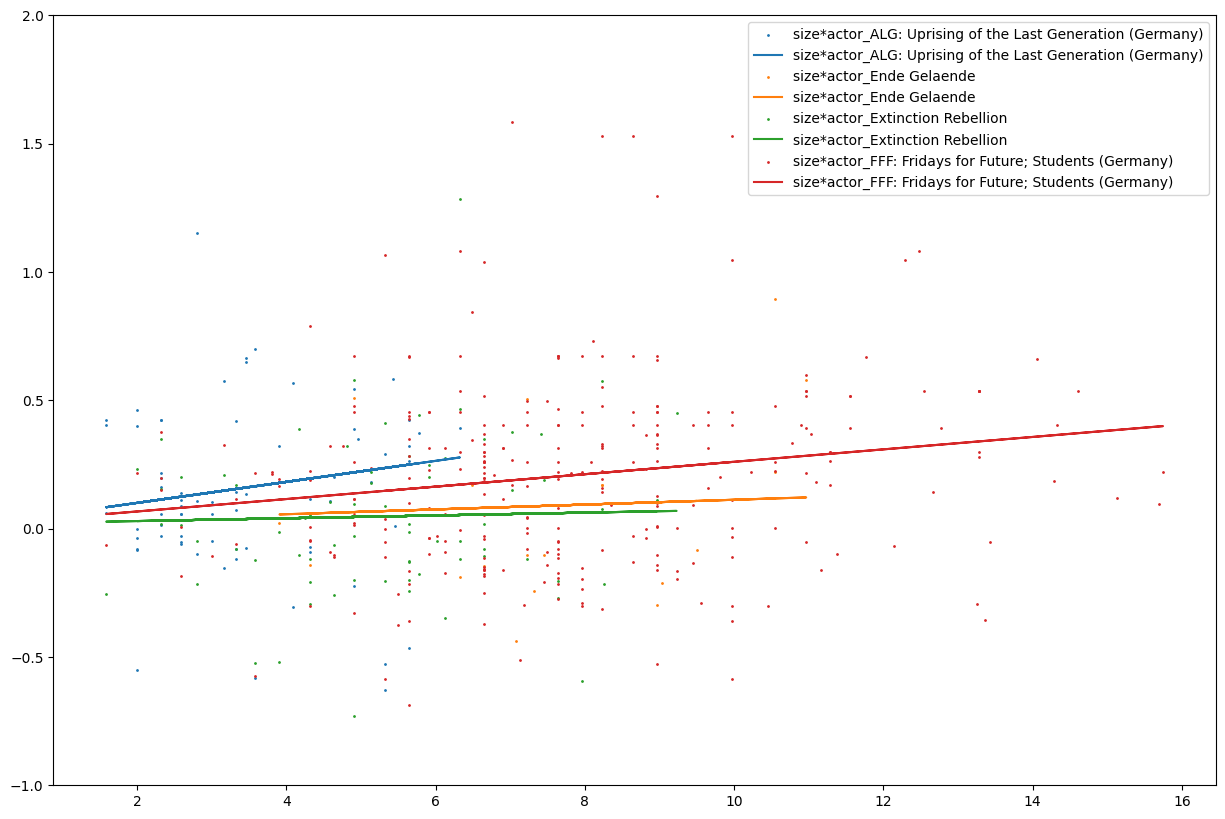

In [168]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for actor in regdf.columns:
    if "actor" in actor:
        regdf_ = regdf[regdf[actor] > 0]
        ax.scatter(regdf_[actor], regdf_["impact"], s=1, label=actor)
        ax.plot(
            regdf_[actor],
            results.params[actor] * regdf_[actor] + results.params["const"],
            label=actor,
        )
ax.set_ylim(-1, 2)
ax.legend()

In [169]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate_not_protest' & method == 'lasso'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
regdf = df_[["size", "relative_impact_1_weeks", "assoc_actor_1"]]
regdf = regdf.rename(
    columns={"assoc_actor_1": "actor", "relative_impact_1_weeks": "impact"}
)

regdf = pd.get_dummies(regdf, columns=["actor"])

regdf = regdf[~regdf["size"].isna()]
regdf["size"] = np.log2(regdf["size"])

for actor in regdf.columns:
    if actor.startswith("actor"):
        regdf[f"size*{actor}"] = regdf["size"] * regdf[actor]
        regdf = regdf.drop(columns=[actor])
regdf = regdf.drop(columns=["size"])

regdf = regdf[~regdf["impact"].isna()]

X = regdf.drop(columns=["impact"])
y = regdf["impact"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 impact   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.220
Date:                Tue, 09 May 2023   Prob (F-statistic):           7.04e-05
Time:                        12:35:46   Log-Likelihood:                -113.26
No. Observations:                 458   AIC:                             236.5
Df Residuals:                     453   BIC:                             257.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

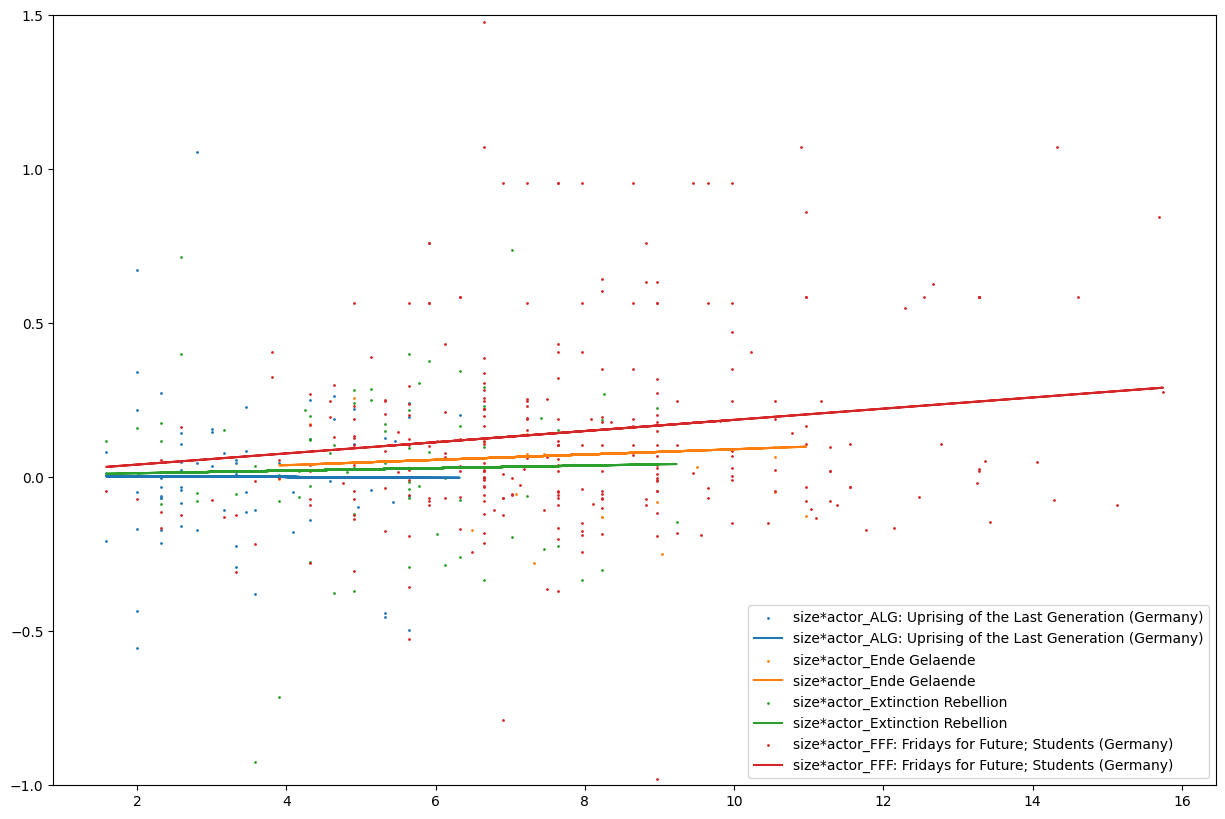

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for actor in regdf.columns:
    if "actor" in actor:
        regdf_ = regdf[regdf[actor] > 0]
        ax.scatter(regdf_[actor], regdf_["impact"], s=1, label=actor)
        ax.plot(
            regdf_[actor],
            results.params[actor] * regdf_[actor] + results.params["const"],
            label=actor,
        )
ax.set_ylim(-1, 1.5)
ax.legend()

### Neuralforecast

In [174]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(1680, 51)


In [175]:
df_ = df.copy()
df_ = df_.sort_values(["size"])
bot = df_.iloc[: len(df_) // 3]
mid = df_.iloc[len(df_) // 3 : (len(df_) // 3) * 2]
top = df_.iloc[(len(df_) // 3) * 2 :]
bot.shape, mid.shape, top.shape

((560, 51), (560, 51), (560, 51))

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_37077/2154516490.py:14: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_37077/2154516490.py:14: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)
/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_37077/2154516490.py:14: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_ = pd.concat(dfs, axis=0)


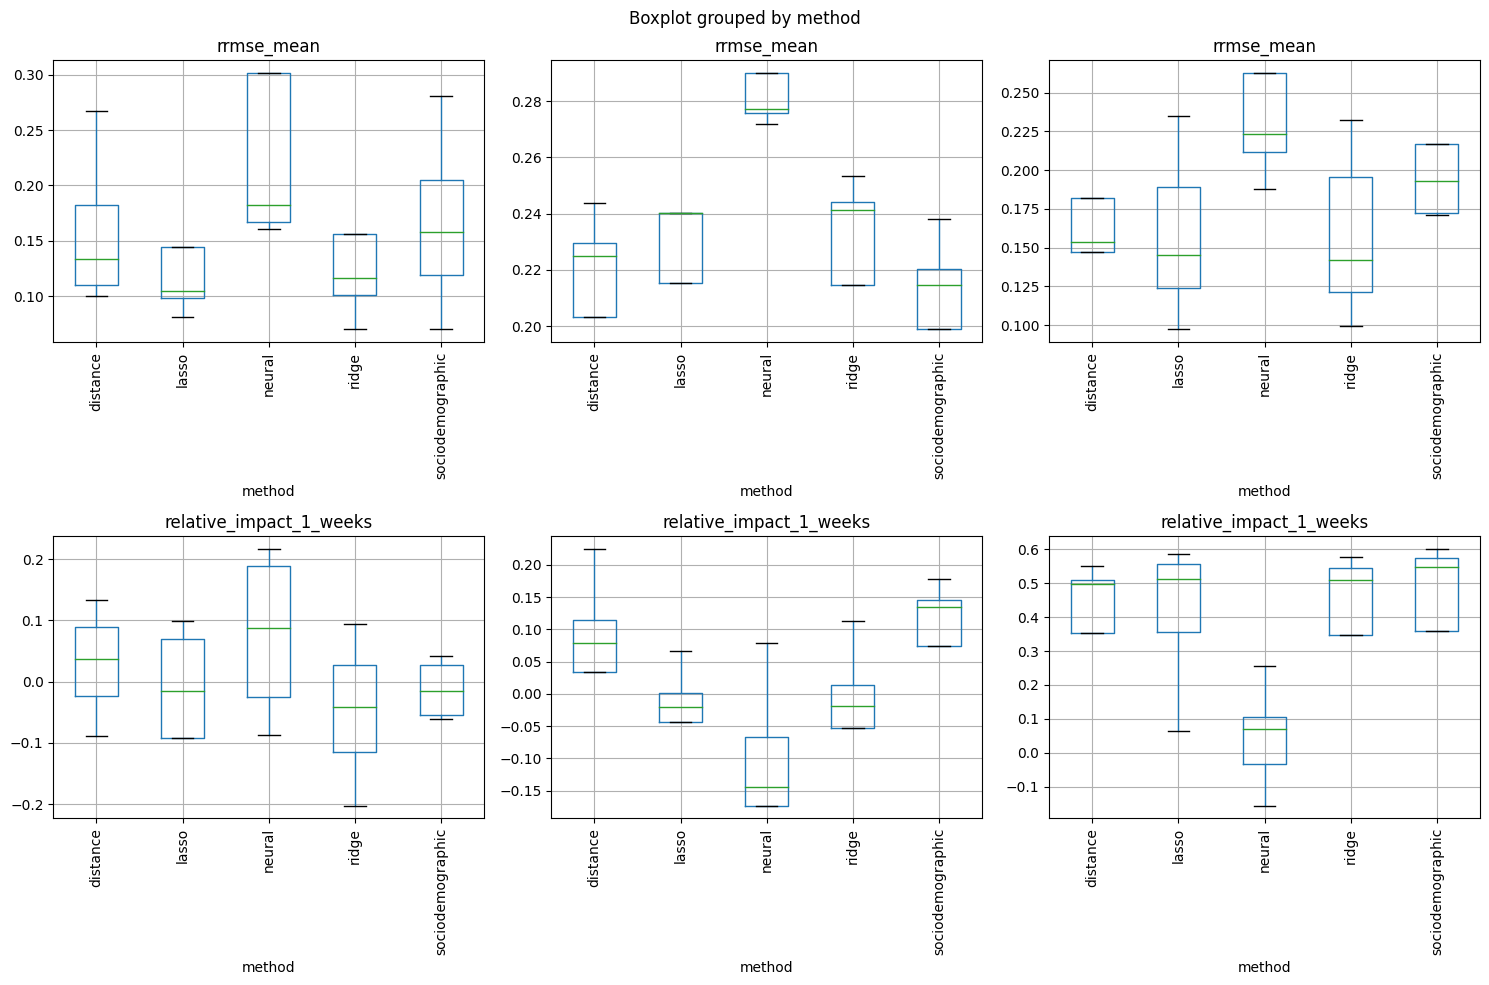

In [176]:
import matplotlib.pyplot as plt

param = "method"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # , sharey=True)
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in df_[param].unique():
        df_a = df_.query(f"discourse_type == 'climate' & {param} == '{value}'")
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse_mean"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse_mean", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_1_weeks",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

### Local model for the impact of size

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels import api as sm

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")

In [2]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate' & method == 'lasso'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
regdf = df_[["size", "relative_impact_1_weeks", "assoc_actor_1"]]
regdf = regdf.rename(
    columns={"assoc_actor_1": "actor", "relative_impact_1_weeks": "impact"}
)
regdf = pd.get_dummies(regdf, columns=["actor"])
regdf = regdf[~regdf["size"].isna()]
regdf["size"] = np.log2(regdf["size"])
for actor in regdf.columns:
    if actor.startswith("actor"):
        regdf[f"size*{actor}"] = regdf["size"] * regdf[actor]
        regdf = regdf.drop(columns=[actor])
regdf = regdf.drop(columns=["size"])
regdf = regdf[~regdf["impact"].isna()]
X = regdf.drop(columns=["impact"])
y = regdf["impact"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 impact   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     7.281
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.09e-05
Time:                        09:15:03   Log-Likelihood:                 27.374
No. Observations:                 458   AIC:                            -44.75
Df Residuals:                     453   BIC:                            -24.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

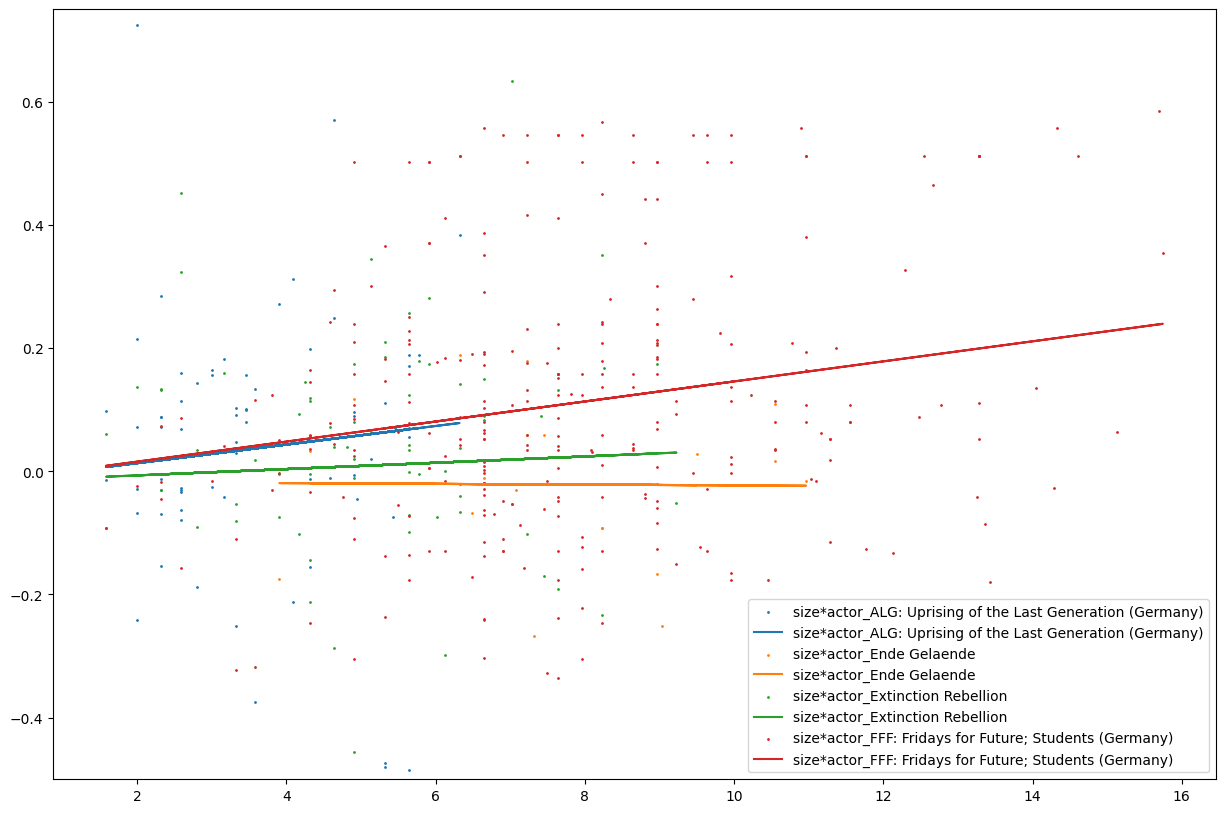

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for actor in regdf.columns:
    if "actor" in actor:
        regdf_ = regdf[regdf[actor] > 0]
        ax.scatter(regdf_[actor], regdf_["impact"], s=1, label=actor)
        ax.plot(
            regdf_[actor],
            results.params[actor] * regdf_[actor] + results.params["const"],
            label=actor,
        )
ax.set_ylim(-0.5, 0.75)
ax.legend()

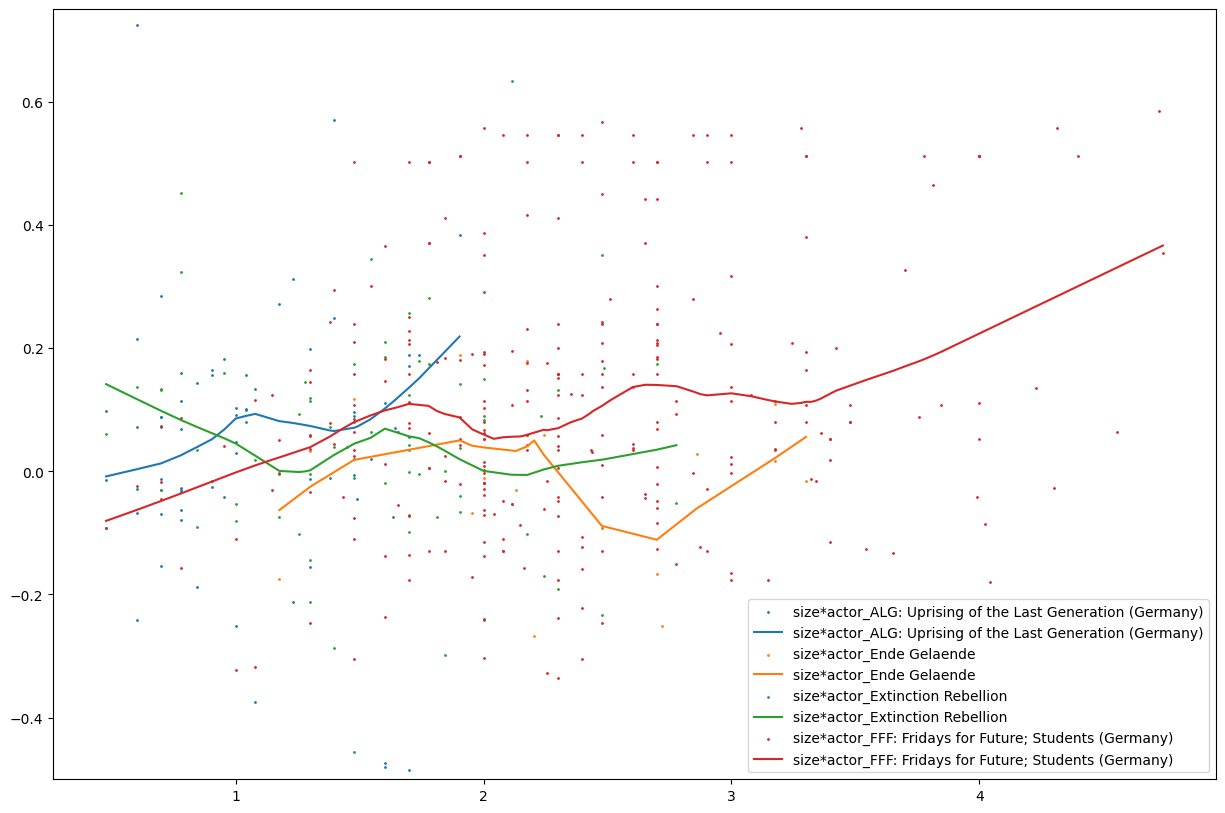

In [16]:
regdf = df_[["size", "relative_impact_1_weeks", "assoc_actor_1"]]
regdf = regdf.rename(
    columns={"assoc_actor_1": "actor", "relative_impact_1_weeks": "impact"}
)
regdf = pd.get_dummies(regdf, columns=["actor"])
regdf = regdf[~regdf["size"].isna()]
regdf["size"] = np.log10(regdf["size"])

from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.nonparametric.smoothers_lowess import lowess

for actor in regdf.columns:
    if actor.startswith("actor"):
        regdf[f"size*{actor}"] = regdf["size"] * regdf[actor]
        regdf = regdf.drop(columns=[actor])
regdf = regdf.drop(columns=["size"])

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for actor in regdf.columns:
    if "actor" in actor:
        regdf_ = regdf[regdf[actor] > 0]
        regdf_ = regdf_.sort_values([actor])
        ax.scatter(regdf_[actor], regdf_["impact"], s=1, label=actor)
        frac = {
            "size*actor_ALG: Uprising of the Last Generation (Germany)": 0.5,
            "size*actor_Ende Gelaende": 0.5,
            "size*actor_Extinction Rebellion": 0.5,
            "size*actor_FFF: Fridays for Future; Students (Germany)": 0.3,
        }[actor]
        smoothed = lowess(regdf_["impact"], regdf_[actor], frac=frac)
        ax.plot(smoothed[:, 0], smoothed[:, 1], label=actor)
        # confidence intervals
        # kr = KernelReg(smoothed[:, 1], smoothed[:, 0], var_type="c")
        # y_pred, y_std = kr.fit(regdf_[actor].values)
        # ci_upper = y_pred + 1.96 * np.ravel(y_std)
        # ci_lower = y_pred - 1.96 * np.ravel(y_std)
        # ax.fill_between(regdf_[actor].values, ci_lower, ci_upper, alpha=0.2)


ax.set_ylim(-0.5, 0.75)
ax.legend()
plt.show()

### Filter by RMSE

In [17]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate' & method == 'lasso'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)

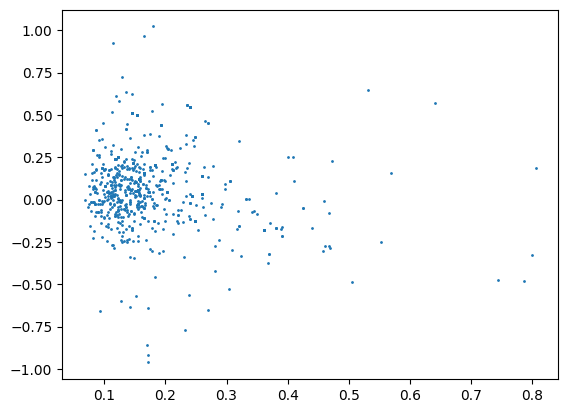

In [18]:
plt.scatter(df_["rrmse_mean"], df_["relative_impact_1_weeks"], s=1)

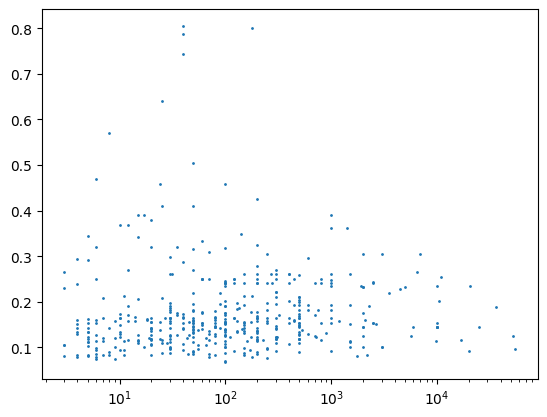

In [59]:
plt.scatter(df_["size"], df_["rrmse_mean"], s=1)
plt.xscale("log")

In [37]:
data = []
for c in np.arange(1.0, 0.0, -0.02):
    df_filtered = df_.query(f"rrmse_mean < {c}")
    data.append(
        dict(
            c=c,
            n=len(df_filtered),
            impact_mean=df_filtered["relative_impact_1_weeks"].mean(),
            impact_std=df_filtered["relative_impact_1_weeks"].std(),
        )
    )
filter_df = pd.DataFrame(data)

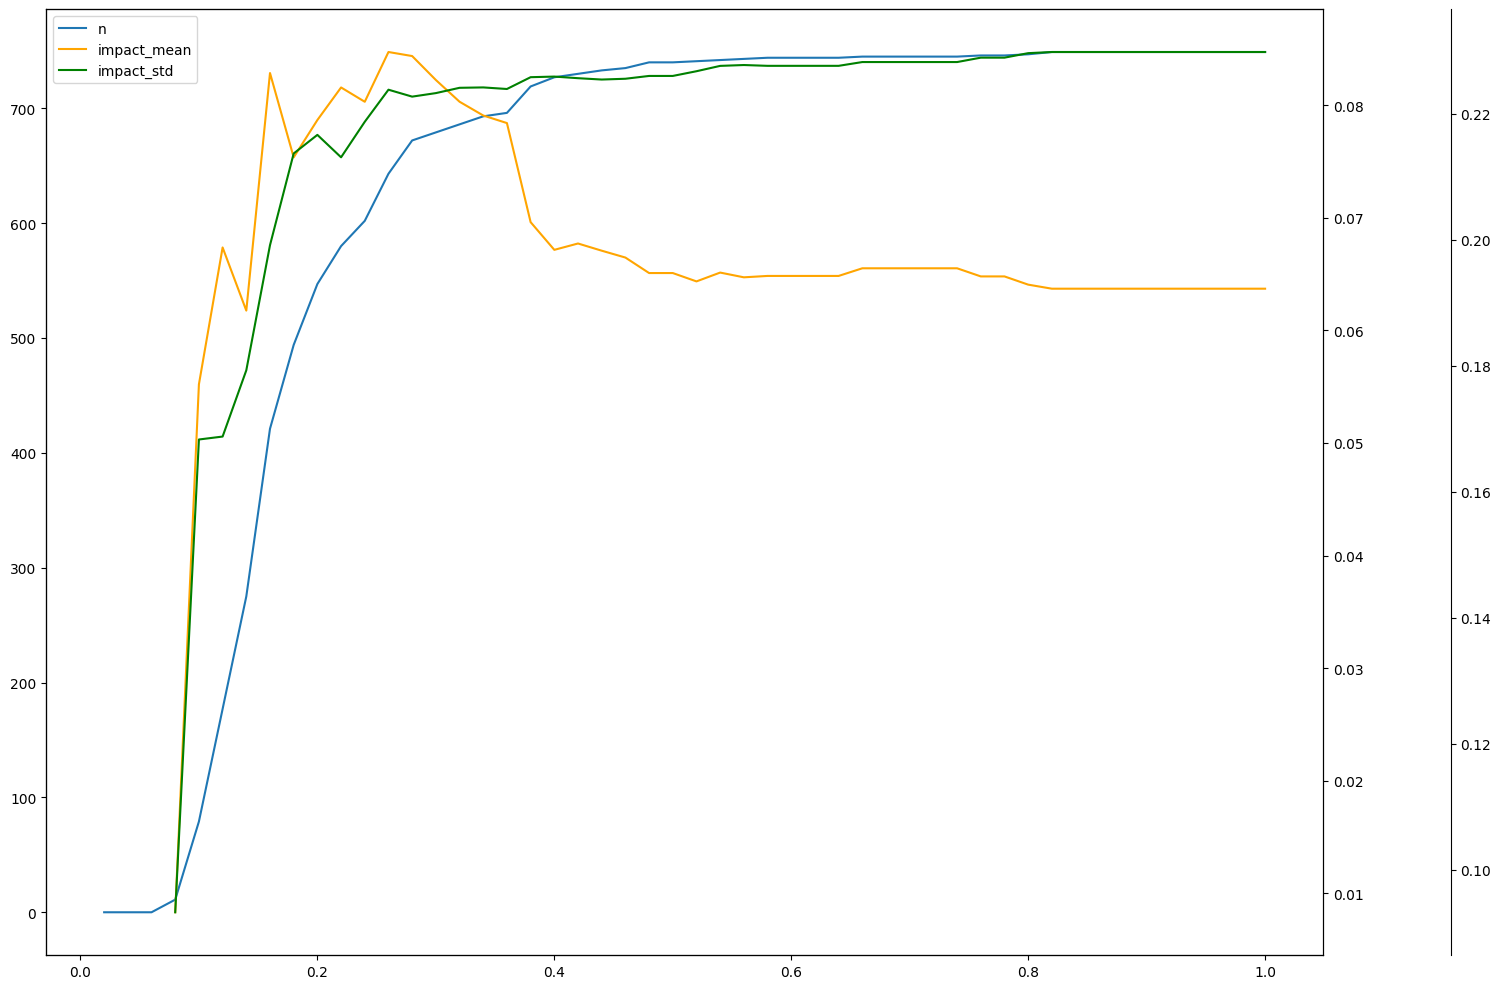

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(filter_df["c"], filter_df["n"], label="n")
ax2 = ax.twinx()
ax2.plot(filter_df["c"], filter_df["impact_mean"], label="impact_mean", color="orange")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.plot(filter_df["c"], filter_df["impact_std"], label="impact_std", color="green")
lns = ax.get_lines() + ax2.get_lines() + ax3.get_lines()
ax.legend(lns, [l.get_label() for l in lns], loc=0)
fig.tight_layout()
plt.show()

In [62]:
df_sorted = df_.sort_values(["rrmse_mean"])
data = []
for l in np.arange(len(df_sorted), 0, -1):
    df_filtered = df_sorted.head(l)
    data.append(
        dict(
            n=l,
            impact_mean=df_filtered["relative_impact_1_weeks"].mean(),
            impact_std=df_filtered["relative_impact_1_weeks"].std(),
            rrmse=df_filtered["rrmse_mean"].max(),
            mean_size=df_filtered["size"].mean(),
        )
    )
filter_df = pd.DataFrame(data)

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_63520/2079195041.py:18: UserWarning: The label '_child1' of <matplotlib.lines.Line2D object at 0x28858ef80> starts with '_'. It is thus excluded from the legend.
  ax.legend(lns, [l.get_label() for l in lns], loc=0)


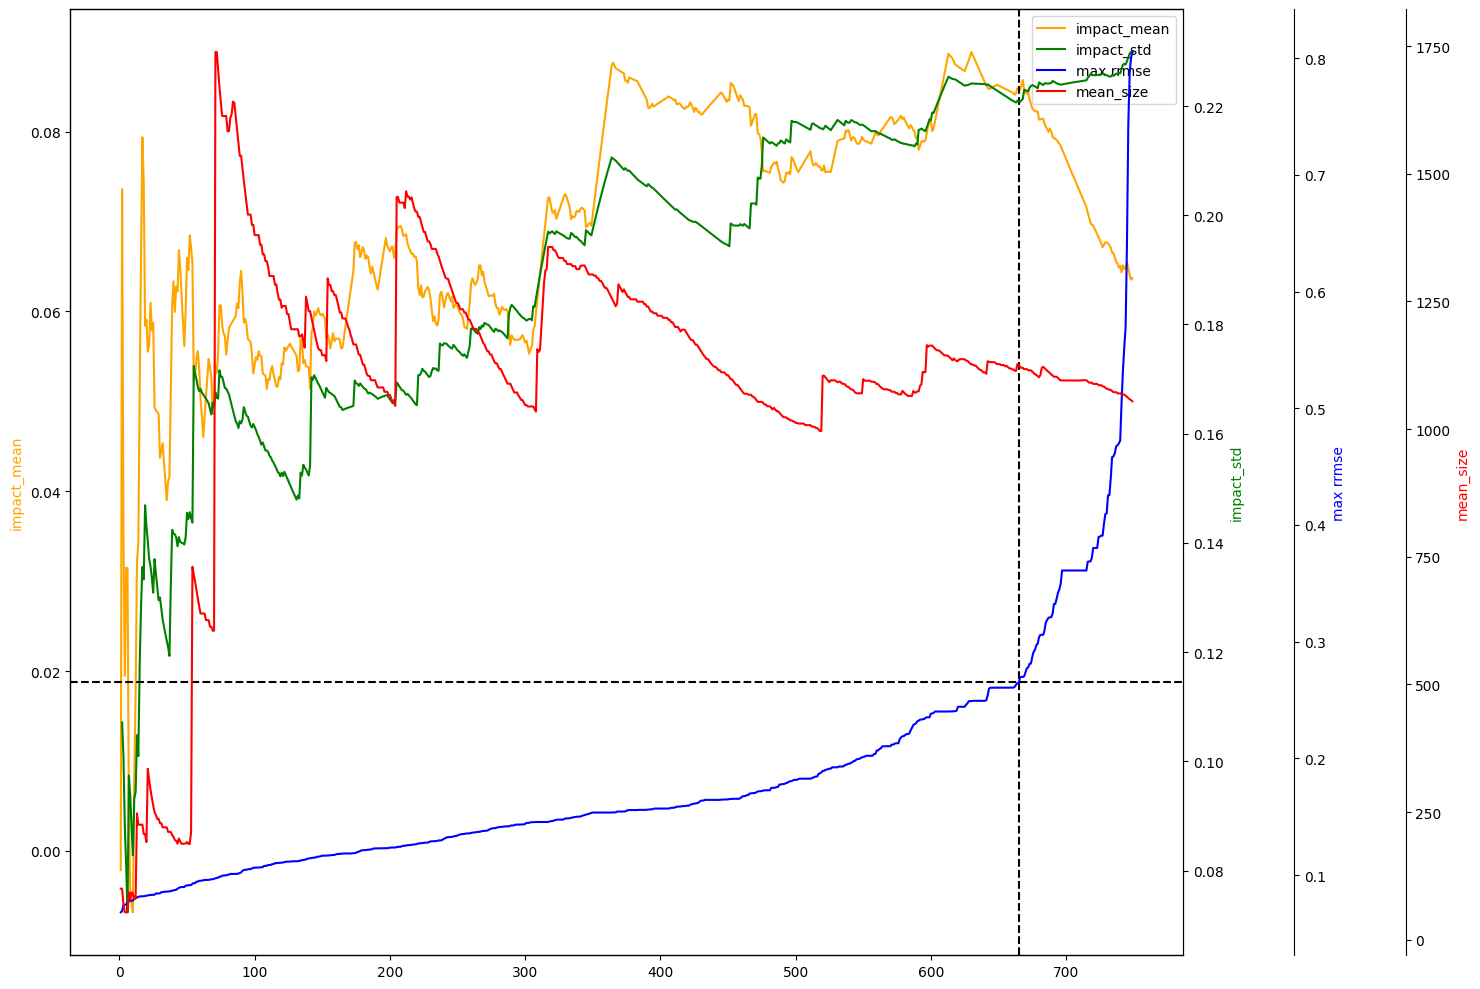

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(filter_df["n"], filter_df["impact_mean"], label="impact_mean", color="orange")
ax.set_ylabel("impact_mean", color="orange")
ax2 = ax.twinx()
ax2.plot(filter_df["n"], filter_df["impact_std"], label="impact_std", color="green")
ax2.set_ylabel("impact_std", color="green")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.plot(filter_df["n"], filter_df["rrmse"], label="max rrmse", color="blue")
ax3.set_ylabel("max rrmse", color="blue")
# horizontal line at y3=0.3
ax3.axhline(y=0.265, color="black", linestyle="--")
ax4 = ax.twinx()
ax4.spines["right"].set_position(("axes", 1.2))
ax4.plot(filter_df["n"], filter_df["mean_size"], label="mean_size", color="red")
ax4.set_ylabel("mean_size", color="red")
lns = ax.get_lines() + ax2.get_lines() + ax3.get_lines() + ax4.get_lines()
ax.legend(lns, [l.get_label() for l in lns], loc=0)
ax.axvline(x=665, color="black", linestyle="--")
fig.tight_layout()
plt.show()

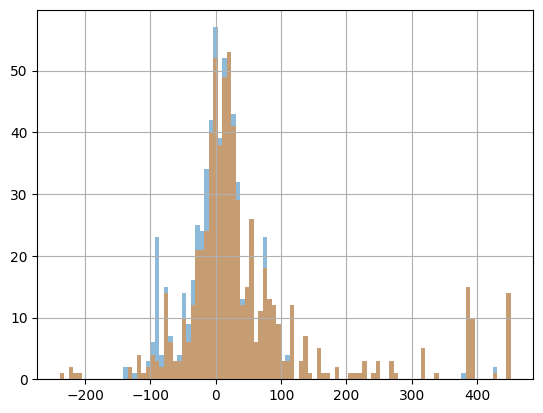

In [92]:
df_["impact_1_weeks"].hist(bins=100, alpha=0.5)
df_.query("rrmse_mean < 0.265")["impact_1_weeks"].hist(bins=100, alpha=0.5)
plt.show()

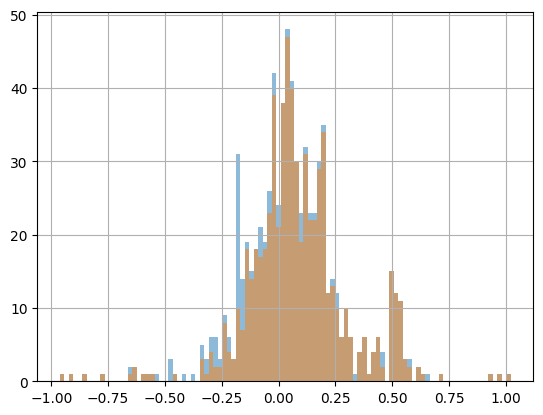

In [91]:
df_["relative_impact_1_weeks"].hist(bins=100, alpha=0.5)
df_.query("rrmse_mean < 0.265")["relative_impact_1_weeks"].hist(bins=100, alpha=0.5)
plt.show()

### Weekly history

In [103]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(40446, 46)


In [106]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate'")
df_ = df_.groupby(["method", "hash"]).apply(
    lambda x: x.sort_values(["rrmse_mean"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape

(0008ae64337cb59801bcb4aeb5b01118    1
 ae23f542aa81a4e90613b3a376a89333    1
 abb727096e8014a561a1cfea8e4d821f    1
 abbaddf7f3897f7648c425256d798062    1
 ac17ad52e817aaebf38823086dd5c06a    1
                                    ..
 5b40ca56c8f45c2f055b97ec1cc4bc34    1
 5b7b53441988c6b6e00a57c9f3bff65d    1
 5bdb5bff253c5884a9ab5c9e616a77e4    1
 5be36700b295098271b8aa2afac084f6    1
 ffefd81c770862db89f165d8131cc81e    1
 Name: hash, Length: 749, dtype: int64,
 lasso    749
 Name: method, dtype: int64,
 (749, 46))

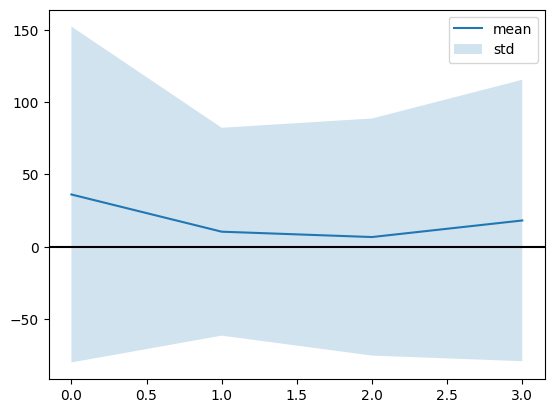

In [111]:
means = [df_[f"impact_week_{i}"].mean() for i in range(4)]
stds = [df_[f"impact_week_{i}"].std() for i in range(4)]
plt.plot(means, label="mean")
# plot the std as a shaded region
plt.fill_between(
    range(4),
    [m - s for m, s in zip(means, stds)],
    [m + s for m, s in zip(means, stds)],
    alpha=0.2,
    label="std",
)
plt.axhline(y=0, color="black")
plt.legend()
plt.show()

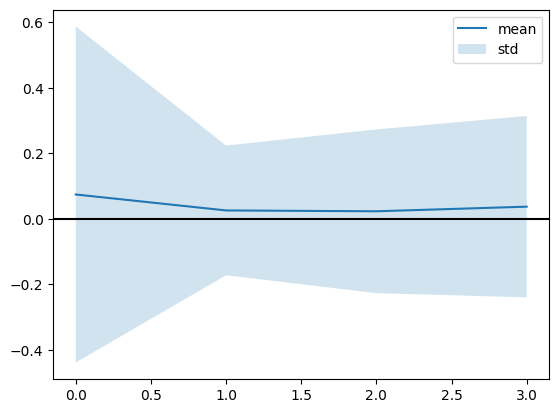

In [110]:
means = [df_[f"relative_impact_week_{i}"].mean() for i in range(4)]
stds = [df_[f"relative_impact_week_{i}"].std() for i in range(4)]
plt.plot(means, label="mean")
# plot the std as a shaded region
plt.fill_between(
    range(4),
    [m - s for m, s in zip(means, stds)],
    [m + s for m, s in zip(means, stds)],
    alpha=0.2,
    label="std",
)
plt.axhline(y=0, color="black")
plt.legend()
plt.show()

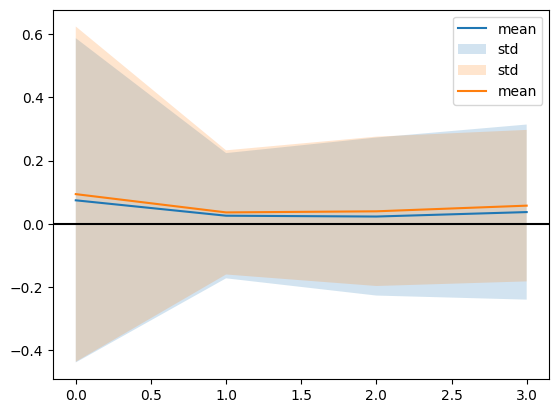

### Effect of aggregation

In [5]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")
print(df.shape)

(80892, 52)


In [42]:
df_ = df.copy()
df_ = df_.sort_values(["size"])
bot = df_.iloc[: len(df_) // 3]
mid = df_.iloc[len(df_) // 3 : (len(df_) // 3) * 2]
top = df_.iloc[(len(df_) // 3) * 2 :]
bot.shape, mid.shape, top.shape

((26964, 52), (26964, 52), (26964, 52))

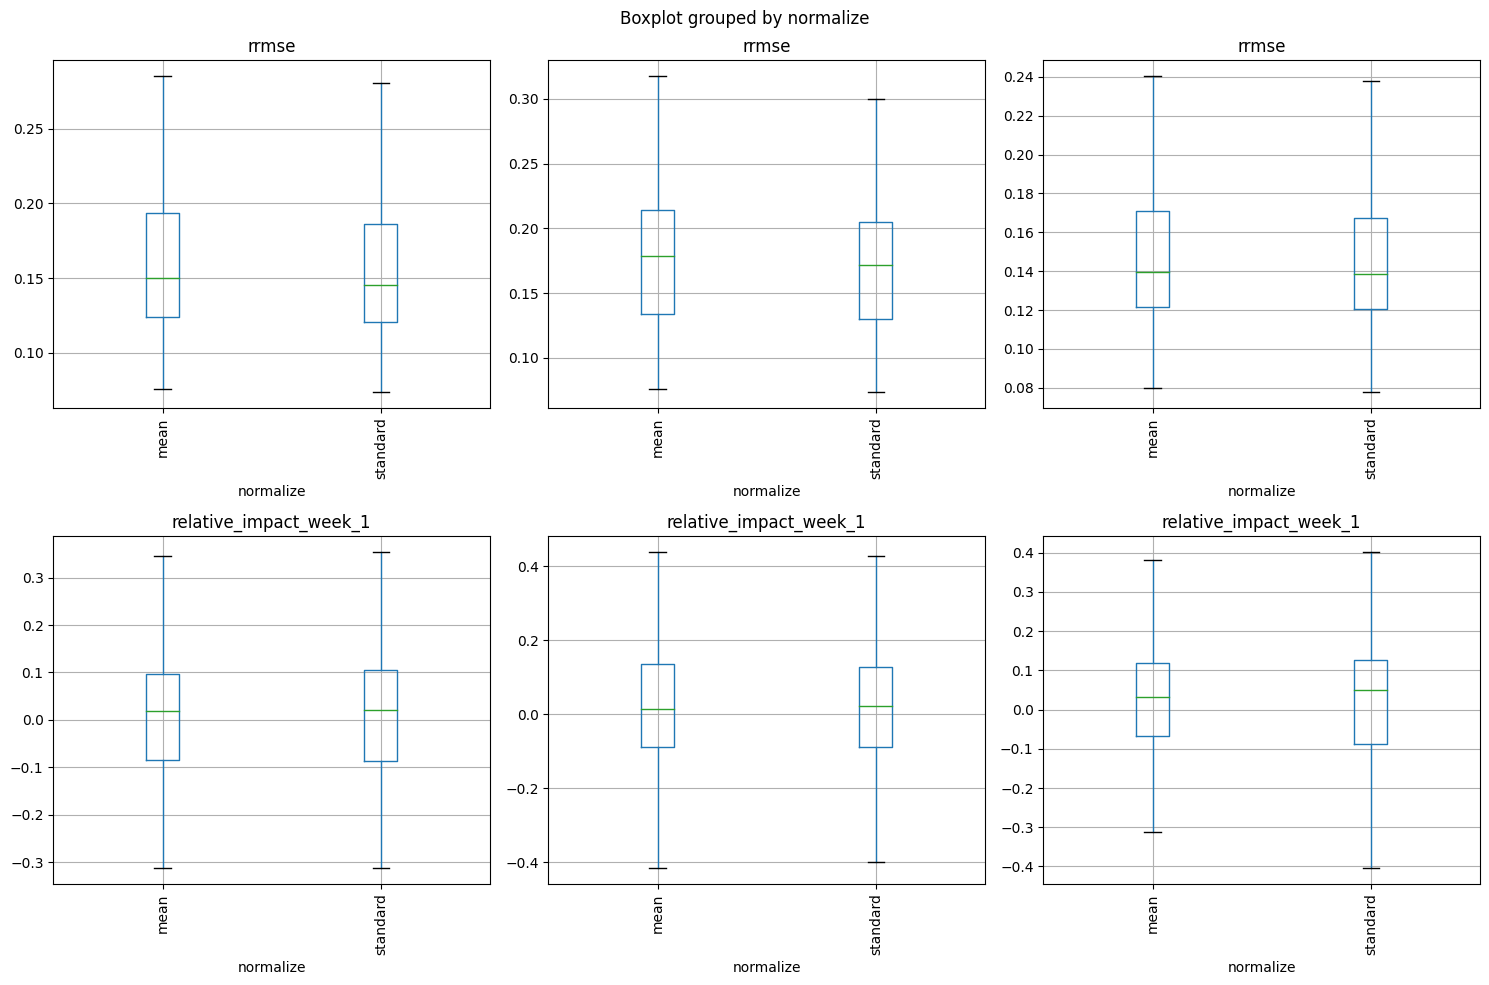

In [38]:
import matplotlib.pyplot as plt

param = "normalize"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # , sharey=True)
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in df_[param].unique():
        df_a = df_.query(f"discourse_type == 'climate' & {param} == '{value}'")
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_week_1",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

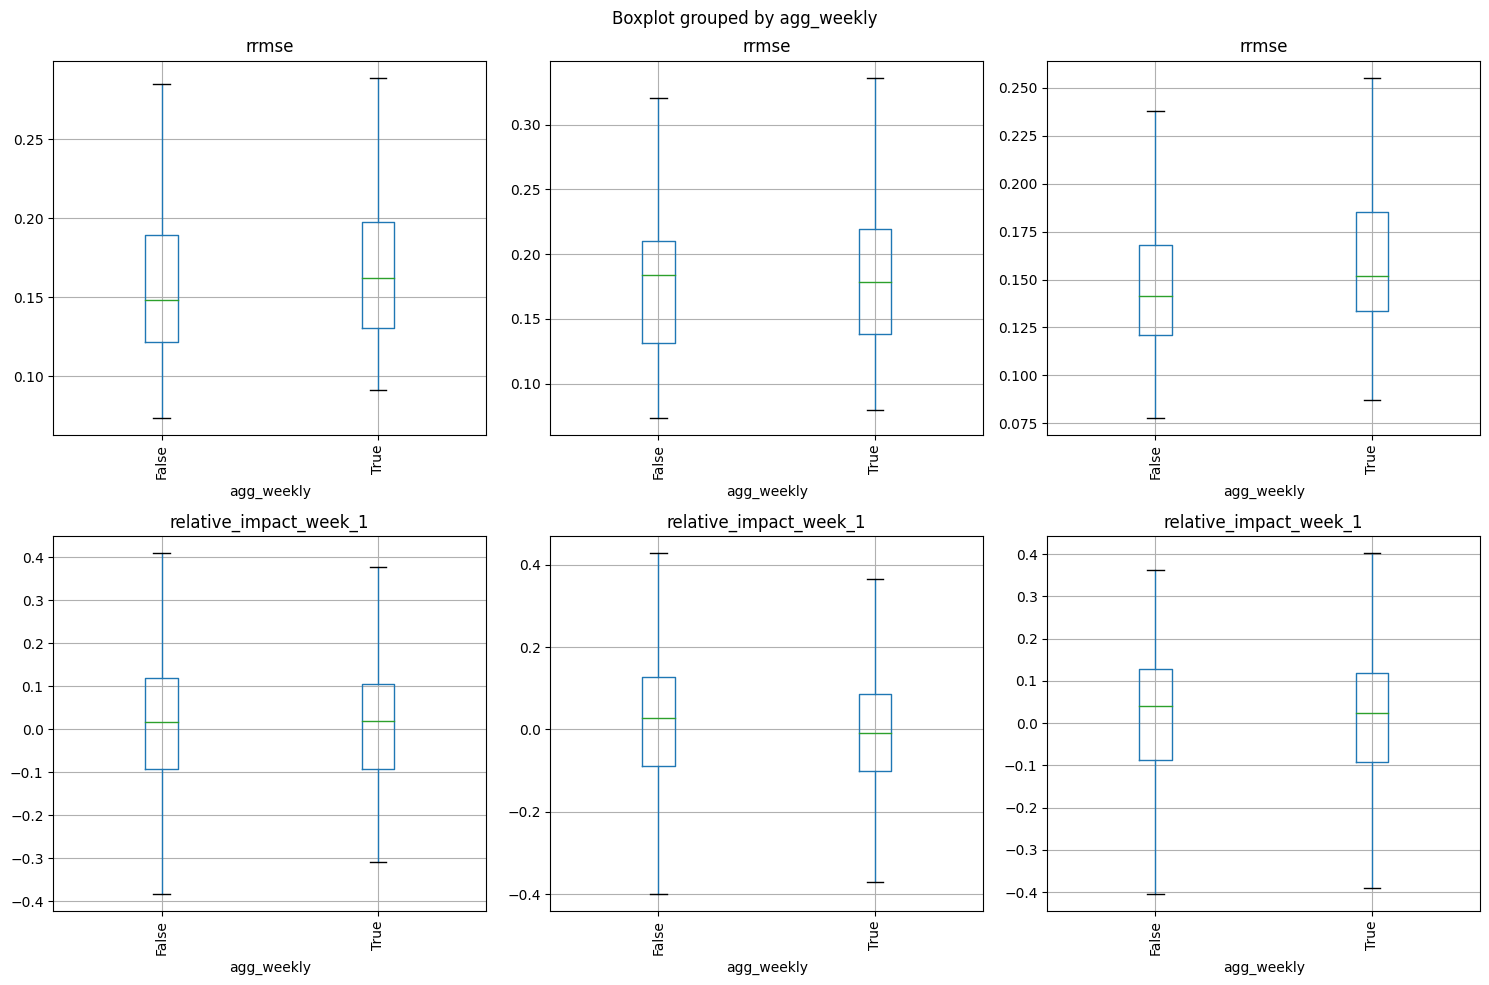

In [47]:
import matplotlib.pyplot as plt

param = "agg_weekly"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # , sharey=True)
for i, df_ in enumerate([bot, mid, top]):
    dfs = []
    for value in [True, False]:
        df_a = df_.query(
            f"discourse_type == 'climate' & normalize== 'standard' & {param} == {value}"
        )
        df_a = df_a.groupby(["method", "hash"], group_keys=True).apply(
            lambda x: x.sort_values(["rrmse"]).head(1)
        )
        df_a.reset_index(drop=True, inplace=True)
        dfs.append(df_a)
    df_ = pd.concat(dfs, axis=0)
    df_.boxplot(column="rrmse", by=param, showfliers=False, ax=ax[0, i], rot=90)
    df_.boxplot(
        column="relative_impact_week_1",
        by=param,
        showfliers=False,
        ax=ax[1, i],
        rot=90,
    )
plt.tight_layout()
plt.show()

In [6]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate'")
df_ = df_.groupby(["method", "hash", "normalize"]).apply(
    lambda x: x.sort_values(["rrmse"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape

(00cd6397cb56d68fc361c166d488e5a7    2
 ae3804a151f7fe1e0bd4014c75c6e413    2
 aaeed9926794f4504377119557d0bc41    2
 ab0511b45e89f7b7c818fa94a93035eb    2
 ab64bbdcf175cae75983adc6dc7b4a1b    2
                                    ..
 506098e9aa64c8677380a31fb3010374    2
 509088ee475e804b5357a814c0e744c4    2
 50d50c774d3335ecd42ed72ab0b10b3c    2
 50ed2891eae536be7bc3f8ccb0e31b8c    2
 fff4f8373774dc09feee400977676515    2
 Name: hash, Length: 749, dtype: int64,
 lasso    1498
 Name: method, dtype: int64,
 (1498, 52))

In [21]:
df_ = df.copy()
df_ = df_.query("discourse_type == 'climate' & agg_weekly == False")
df_ = df_.groupby(["method", "hash", "normalize"]).apply(
    lambda x: x.sort_values(["rrmse"]).head(1)
)
df_.reset_index(drop=True, inplace=True)
df_["hash"].value_counts(), df_["method"].value_counts(), df_.shape

(00cd6397cb56d68fc361c166d488e5a7    2
 ae3804a151f7fe1e0bd4014c75c6e413    2
 aaeed9926794f4504377119557d0bc41    2
 ab0511b45e89f7b7c818fa94a93035eb    2
 ab64bbdcf175cae75983adc6dc7b4a1b    2
                                    ..
 506098e9aa64c8677380a31fb3010374    2
 509088ee475e804b5357a814c0e744c4    2
 50d50c774d3335ecd42ed72ab0b10b3c    2
 50ed2891eae536be7bc3f8ccb0e31b8c    2
 fff4f8373774dc09feee400977676515    2
 Name: hash, Length: 749, dtype: int64,
 lasso    1498
 Name: method, dtype: int64,
 (1498, 52))

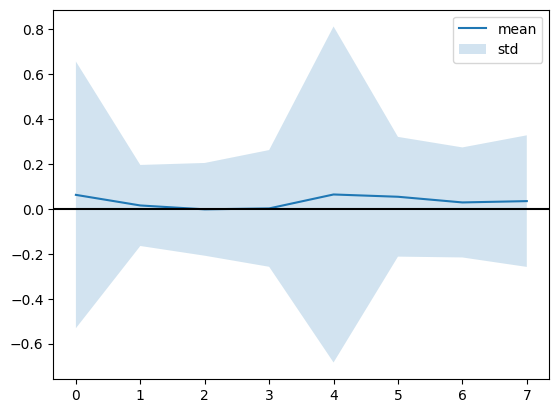

In [30]:
impact_means = [df_[f"relative_impact_week_{i}"].mean() for i in range(8)]
impact_stds = [df_[f"relative_impact_week_{i}"].std() for i in range(8)]
plt.plot(impact_means, label="mean")
plt.fill_between(
    range(8),
    [m - s for m, s in zip(impact_means, impact_stds)],
    [m + s for m, s in zip(impact_means, impact_stds)],
    alpha=0.2,
    label="std",
)
plt.axhline(y=0, color="black")
plt.legend()
plt.show()

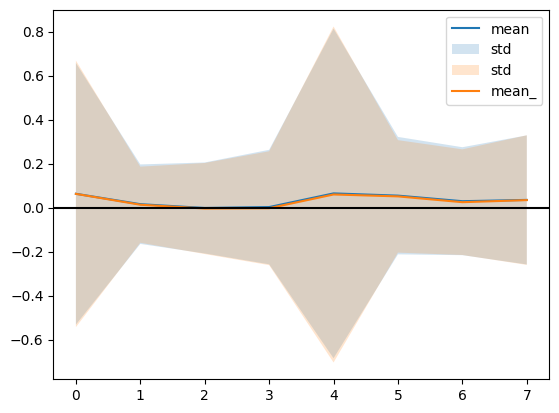

In [33]:
means = [df_[f"relative_impact_week_{i}"].mean() for i in range(8)]
stds = [df_[f"relative_impact_week_{i}"].std() for i in range(8)]
plt.plot(means, label="mean")
plt.fill_between(
    range(8),
    [m - s for m, s in zip(means, stds)],
    [m + s for m, s in zip(means, stds)],
    alpha=0.2,
    label="std",
)
means_ = [
    df_.query("rrmse < 0.265")[f"relative_impact_week_{i}"].mean() for i in range(8)
]
stds_ = [
    df_.query("rrmse < 0.265")[f"relative_impact_week_{i}"].std() for i in range(8)
]
plt.fill_between(
    range(8),
    [m - s for m, s in zip(means_, stds_)],
    [m + s for m, s in zip(means_, stds_)],
    alpha=0.2,
    label="std",
)
plt.plot(means_, label="mean_")
plt.axhline(y=0, color="black")
plt.legend()
plt.show()

### Replicate from above

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels import api as sm

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")

In [24]:
df_ = df.copy()
df_ = df_.query(
    "discourse_type == 'climate' & method == 'lasso' & agg_weekly == True & normalize == 'standard'"
)
df_ = df_.groupby(["method", "hash"]).apply(lambda x: x.sort_values(["rrmse"]).head(1))
df_.reset_index(drop=True, inplace=True)

In [25]:
len(df_)

749

In [26]:
import numpy as np

df_sorted = df_.sort_values(["rrmse"])
data = []
for l in np.arange(len(df_sorted), 0, -1):
    df_filtered = df_sorted.head(l)
    data.append(
        dict(
            n=l,
            impact_mean=df_filtered["relative_impact_week_0"].mean(),
            impact_std=df_filtered["relative_impact_week_0"].std(),
            rrmse=df_filtered["rrmse"].max(),
            mean_size=df_filtered["size"].mean(),
        )
    )
filter_df = pd.DataFrame(data)

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_6846/919271130.py:18: UserWarning: The label '_child1' of <matplotlib.lines.Line2D object at 0x2896c4b20> starts with '_'. It is thus excluded from the legend.
  ax.legend(lns, [l.get_label() for l in lns], loc=0)


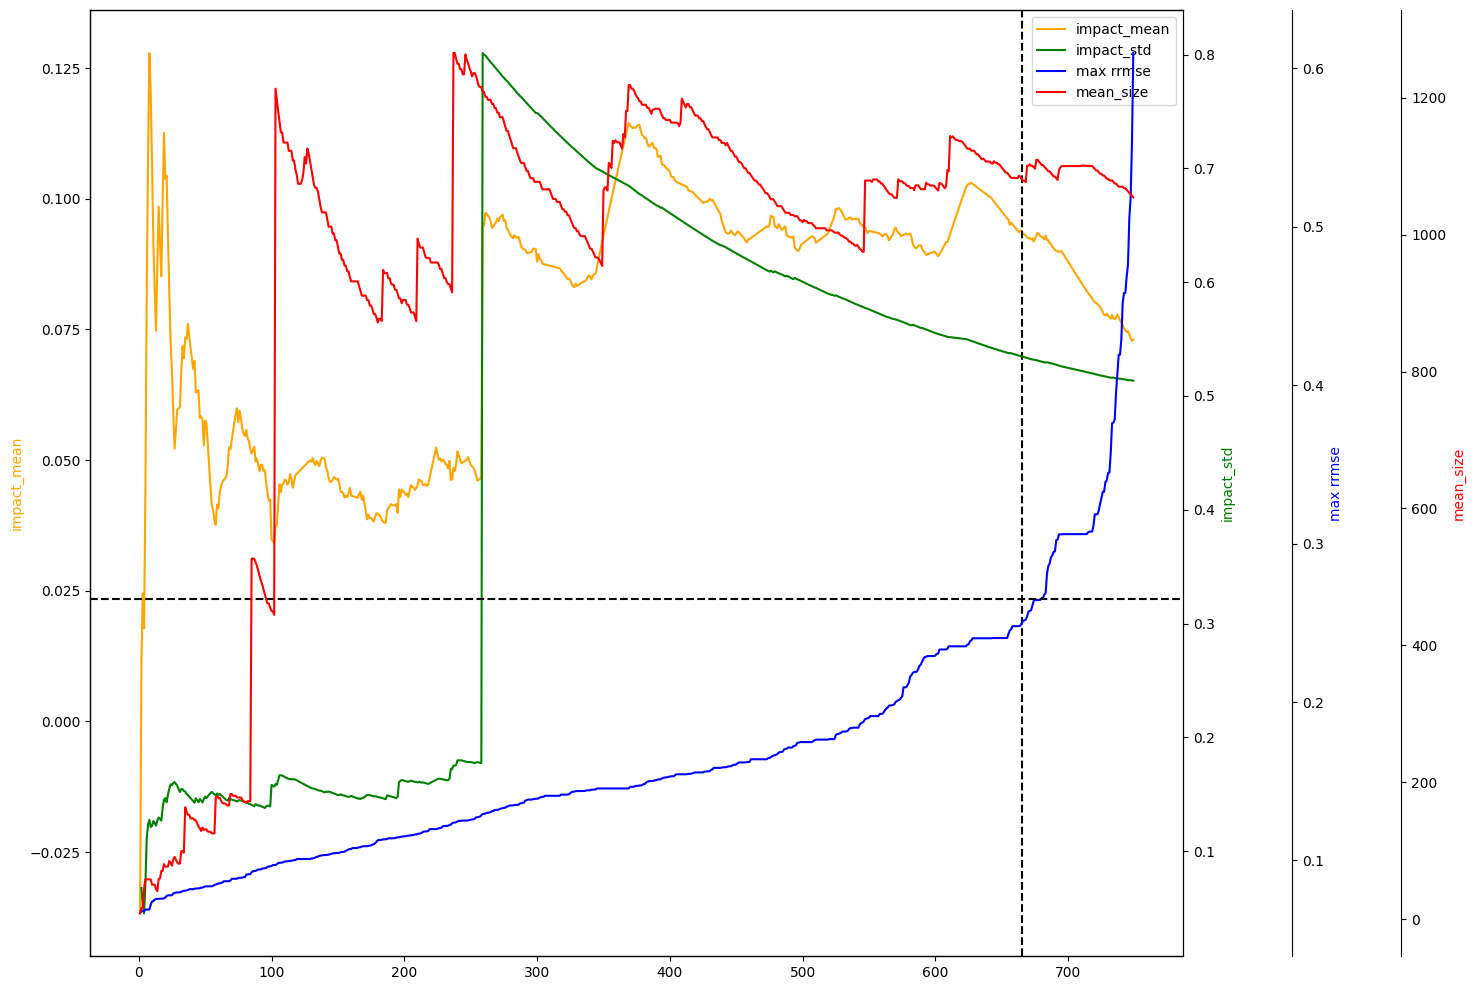

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(filter_df["n"], filter_df["impact_mean"], label="impact_mean", color="orange")
ax.set_ylabel("impact_mean", color="orange")
ax2 = ax.twinx()
ax2.plot(filter_df["n"], filter_df["impact_std"], label="impact_std", color="green")
ax2.set_ylabel("impact_std", color="green")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.plot(filter_df["n"], filter_df["rrmse"], label="max rrmse", color="blue")
ax3.set_ylabel("max rrmse", color="blue")
# horizontal line at y3=0.3
ax3.axhline(y=0.265, color="black", linestyle="--")
ax4 = ax.twinx()
ax4.spines["right"].set_position(("axes", 1.2))
ax4.plot(filter_df["n"], filter_df["mean_size"], label="mean_size", color="red")
ax4.set_ylabel("mean_size", color="red")
lns = ax.get_lines() + ax2.get_lines() + ax3.get_lines() + ax4.get_lines()
ax.legend(lns, [l.get_label() for l in lns], loc=0)
ax.axvline(x=665, color="black", linestyle="--")
fig.tight_layout()
plt.show()

<Axes: >

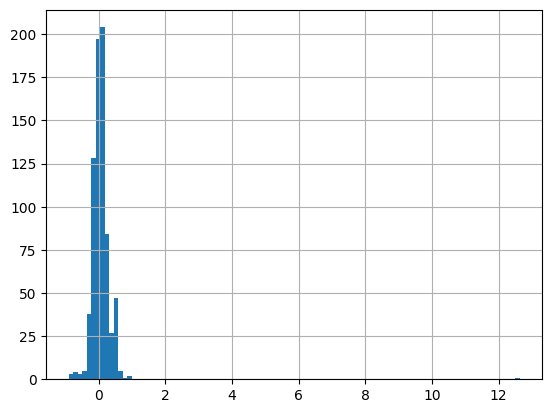

In [28]:
df_["relative_impact_week_0"].hist(bins=100)

In [36]:
df_[df_["relative_impact_week_0"] > 2].to_dict()

{'method': {102: 'lasso'},
 'interpretable': {102: True},
 'alpha': {102: 0.01},
 'agg_weekly': {102: True},
 'normalize': {102: 'standard'},
 'training_interval': {102: 84},
 'use_autoregressor': {102: False},
 'lags': {102: 14},
 'start_date': {102: '2020-01-01'},
 'end_date': {102: '2022-12-31'},
 'protest_group': {102: 'eg'},
 'source': {102: 'mediacloud'},
 'discourse_type': {102: 'climate'},
 'co_terms': {102: nan},
 'prediction_interval': {102: 28},
 'event_date': {102: '2020-07-25T00:00:00'},
 'sub_event_type': {102: 'Protest with intervention'},
 'assoc_actor_1': {102: 'Ende Gelaende'},
 'admin1': {102: 'Nordrhein-Westfalen'},
 'location': {102: 'Juchen'},
 'notes': {102: 'On 25 July 2020, between 60 to 100 Ende Gelaende activists protested in Garzweiler at the open pit mine by entering the mine. The activists were stopped by police. One activist was detained. [size=between 60 to 100]'},
 'weekday': {102: 'Saturday'},
 'region_code': {102: 'NW'},
 'size': {102: 80.0},
 'hash':

## Dereko

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels import api as sm

from protest_impact.util import project_root

df = pd.read_csv(project_root / "hyperopt" / "results.csv", compression="gzip")

In [24]:
df_ = df.copy()
df_ = df_.query(
    "source == 'dereko_scrape' & discourse_type == 'climate' & method == 'lasso' & pruned != True"
)
df_.shape

(607, 44)

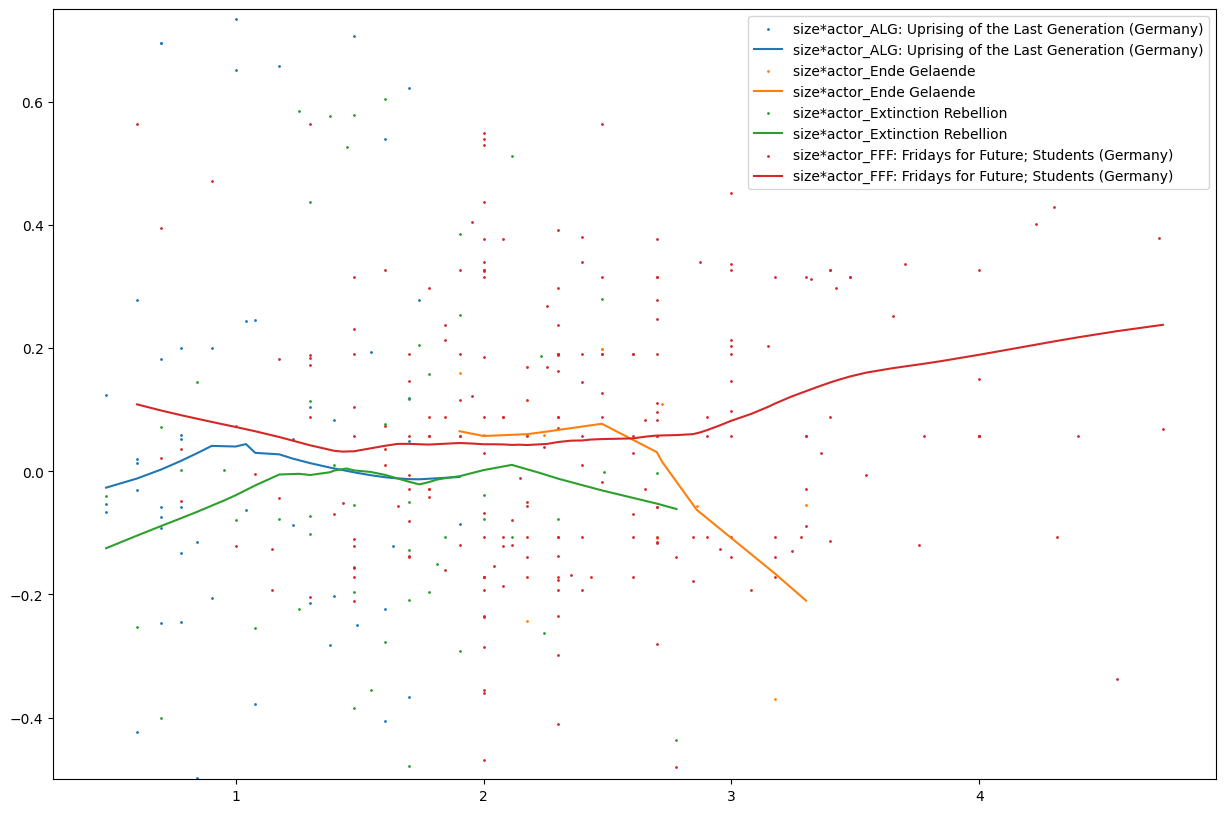

In [27]:
regdf = df_[["size", "relative_impact_week_1", "assoc_actor_1"]]
regdf = regdf.rename(
    columns={"assoc_actor_1": "actor", "relative_impact_week_1": "impact"}
)
regdf = pd.get_dummies(regdf, columns=["actor"])
regdf = regdf[~regdf["size"].isna()]
regdf["size"] = np.log10(regdf["size"])

from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.nonparametric.smoothers_lowess import lowess

for actor in regdf.columns:
    if actor.startswith("actor"):
        regdf[f"size*{actor}"] = regdf["size"] * regdf[actor]
        regdf = regdf.drop(columns=[actor])
regdf = regdf.drop(columns=["size"])

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for actor in regdf.columns:
    if "actor" in actor:
        regdf_ = regdf[regdf[actor] > 0]
        regdf_ = regdf_.sort_values([actor])
        ax.scatter(regdf_[actor], regdf_["impact"], s=1, label=actor)
        frac = {
            "size*actor_ALG: Uprising of the Last Generation (Germany)": 0.7,
            "size*actor_Ende Gelaende": 0.7,
            "size*actor_Extinction Rebellion": 0.7,
            "size*actor_FFF: Fridays for Future; Students (Germany)": 0.5,
        }[actor]
        smoothed = lowess(regdf_["impact"], regdf_[actor], frac=frac)
        ax.plot(smoothed[:, 0], smoothed[:, 1], label=actor)
ax.set_ylim(-0.5, 0.75)
ax.legend()
plt.show()

In [28]:
df_ = df.copy()
df_ = df_.query(
    "source == 'dereko_scrape' & discourse_type == 'climate' & method == 'lasso' & pruned != True"
)
df_.shape

(607, 44)

In [29]:
df_ = df_.groupby(["method", "hash"]).apply(lambda x: x.sort_values(["rrmse"]).head(1))
df_.reset_index(drop=True, inplace=True)
regdf = df_[["size", "relative_impact_week_1", "assoc_actor_1"]]
regdf = regdf.rename(
    columns={"assoc_actor_1": "actor", "relative_impact_week_1": "impact"}
)
regdf = pd.get_dummies(regdf, columns=["actor"])
regdf = regdf[~regdf["size"].isna()]
regdf["size"] = np.log2(regdf["size"])
for actor in regdf.columns:
    if actor.startswith("actor"):
        regdf[f"size*{actor}"] = regdf["size"] * regdf[actor]
        # regdf = regdf.drop(columns=[actor])
regdf = regdf.drop(columns=["size"])
regdf = regdf[~regdf["impact"].isna()]
regdf.head()

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_20441/1096712961.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_ = df_.groupby(["method", "hash"]).apply(


,impact,actor_ALG: Uprising of the Last Generation (Germany),actor_Ende Gelaende,actor_Extinction Rebellion,actor_FFF: Fridays for Future; Students (Germany),size*actor_ALG: Uprising of the Last Generation (Germany),size*actor_Ende Gelaende,size*actor_Extinction Rebellion,size*actor_FFF: Fridays for Future; Students (Germany)
1,-0.284475,0,0,0,1,0.0,0.0,0.0,6.643856
2,-0.138346,0,0,0,1,0.0,0.0,0.0,5.643856
5,-0.138346,0,0,0,1,0.0,0.0,0.0,7.643856
8,-0.359595,0,0,0,1,0.0,0.0,0.0,6.643856
13,0.169460,0,0,0,1,0.0,0.0,0.0,7.491853


In [30]:
X = regdf.drop(columns=["impact"])
y = regdf["impact"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 impact   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8088
Date:                Thu, 11 May 2023   Prob (F-statistic):              0.580
Time:                        12:25:58   Log-Likelihood:                -68.067
No. Observations:                 365   AIC:                             152.1
Df Residuals:                     357   BIC:                             183.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

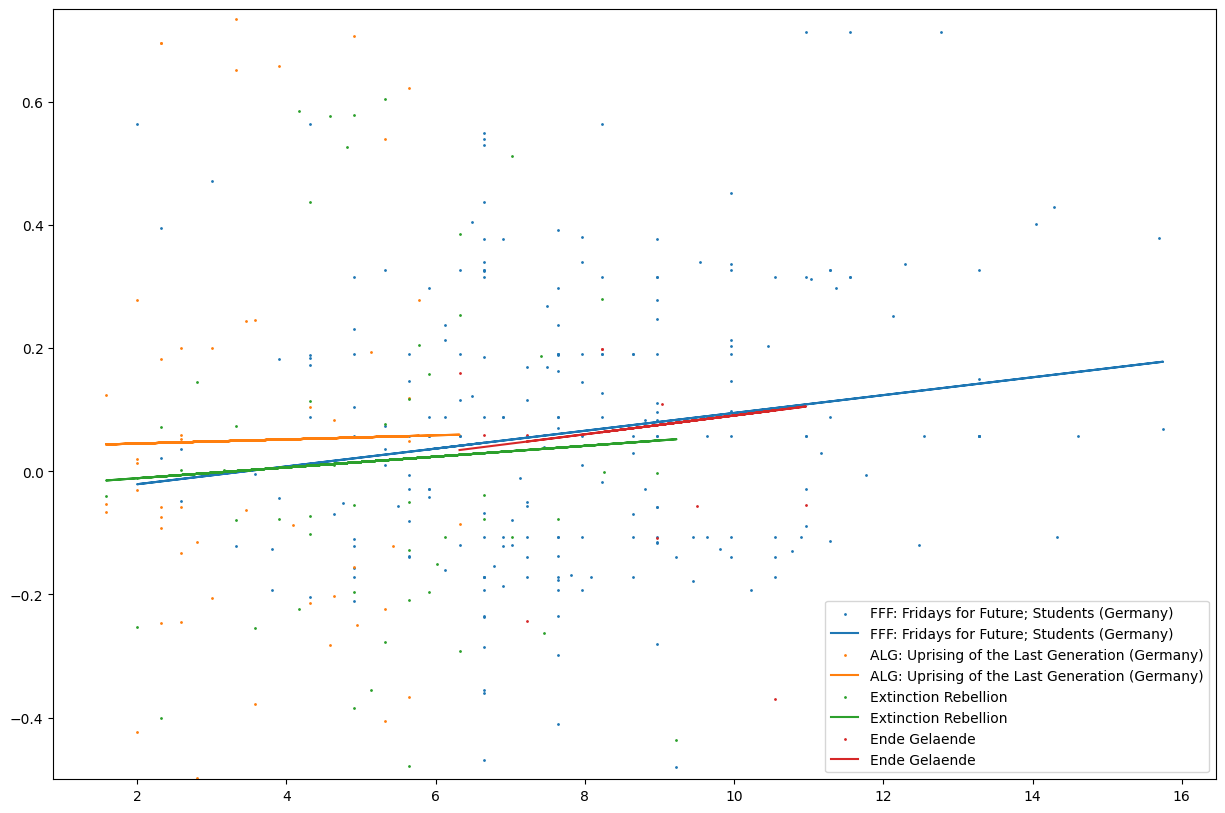

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for actor in df_["assoc_actor_1"].unique():
    regdf_ = regdf[regdf[f"actor_{actor}"] > 0]
    ax.scatter(regdf_[f"size*actor_{actor}"], regdf_["impact"], s=1, label=actor)
    ax.plot(
        regdf_[f"size*actor_{actor}"],
        results.params[f"size*actor_{actor}"] * regdf_[f"size*actor_{actor}"]
        + results.params[f"actor_{actor}"]
        + results.params["const"],
        label=actor,
    )
ax.set_ylim(-0.5, 0.75)
ax.legend()